In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df  = pd.read_csv('/content/UCIdiabetes.csv')

How big the data is

In [ ]:
df.shape

(69169, 51)

How does data look

In [ ]:
df

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted,diag_1_name,diag_2_name,diag_3_name
0,1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,...,No,No,No,No,No,No,NO,diabetes,Other,Other
1,2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,...,No,No,No,No,Ch,Yes,>30,Other,diabetes,Other
2,3,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,...,No,No,No,No,No,Yes,NO,Other,diabetes,Other
3,4,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,...,No,No,No,No,Ch,Yes,NO,Other,diabetes,circulatory diseases
4,5,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,...,No,No,No,No,Ch,Yes,NO,neoplasms,neoplasms,diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69164,69165,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,...,No,No,No,No,Ch,Yes,>30,diabetes,Other,circulatory diseases
69165,69166,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,...,No,No,No,No,No,Yes,NO,digestive diseases,Other,digestive diseases
69166,69167,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,...,No,No,No,No,Ch,Yes,NO,Other,genitournary,Other
69167,69168,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,...,No,No,No,No,Ch,Yes,NO,injury,Other,injury


In [ ]:
df = df.drop(df.columns[0], axis=1)

In [ ]:
df.sample(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted,diag_1_name,diag_2_name,diag_3_name
36961,158598612,107124192,Caucasian,Male,[40-50),?,1,1,2,7,...,No,No,No,No,No,Yes,NO,diabetes,respiratory diseases,Other
5105,37288284,2785824,Caucasian,Female,[70-80),[100-125),6,6,17,7,...,No,No,No,No,No,Yes,>30,circulatory diseases,circulatory diseases,circulatory diseases
49231,221812188,38385846,Caucasian,Male,[90-100),?,1,3,7,4,...,No,No,No,No,Ch,Yes,NO,respiratory diseases,circulatory diseases,Other
62328,340222922,39492657,AfricanAmerican,Female,[40-50),?,1,2,7,1,...,No,No,No,No,No,No,NO,digestive diseases,Other,circulatory diseases
2530,23288934,22777065,AfricanAmerican,Female,[70-80),?,1,1,7,2,...,No,No,No,No,No,No,NO,digestive diseases,Other,Other


data type of cols

In [ ]:
df = df.replace('?', np.nan)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69169 entries, 0 to 69168
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              69169 non-null  int64 
 1   patient_nbr               69169 non-null  int64 
 2   race                      67327 non-null  object
 3   gender                    69169 non-null  object
 4   age                       69169 non-null  object
 5   weight                    2775 non-null   object
 6   admission_type_id         69169 non-null  int64 
 7   discharge_disposition_id  69169 non-null  int64 
 8   admission_source_id       69169 non-null  int64 
 9   time_in_hospital          69169 non-null  int64 
 10  payer_code                39935 non-null  object
 11  medical_specialty         35920 non-null  object
 12  num_lab_procedures        69169 non-null  int64 
 13  num_procedures            69169 non-null  int64 
 14  num_medications       

In [ ]:
df = df.drop(df.columns[[0,1]], axis=1)

In [ ]:
# Convert specified columns to categorical
for col in ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']:
    if col in df.columns:
        df[col] = df[col].astype('object')

# **Profiling**


In [ ]:
#!pip install ydata_profiling

In [ ]:
from ydata_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/summary_pandas.py:47: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  series = series.fillna(np.nan)
/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/summary_pandas.py:47: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  series = series.fillna(np.nan)
/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/summary_pandas.py:47: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call res

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **Output of Profiling**


**Run the profile builder to get a interactive dashboard of initial** **analysis**

Summary statistics

In [ ]:
df.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,69169.000000,69169.000000,69169.000000,69169.000000,69169.000000,69169.000000,69169.000000,69169.000000
mean,4.291012,43.099524,1.393543,15.802513,0.324524,0.138892,0.454611,7.300915
std,2.955451,19.761672,1.734463,8.243145,1.171410,0.682159,0.977924,1.984538
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,3.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,129.000000,6.000000,81.000000,40.000000,54.000000,16.000000,16.000000


Missing values ?

mean of num_medications = 15.802513
mean of num_lab_procedures = 43.099524

~16 medications per person, and 43 lab procedures per person !!


In [ ]:
# Display columns with missing values and their counts
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])

weight               66394
medical_specialty    33249
payer_code           29234
race                  1842
dtype: int64


% missing per col

In [ ]:
miss = df.isnull().sum(axis=0) / df.shape[0] * 100
miss = miss.sort_values(ascending = False)
print(miss[miss>0])

weight               95.988087
medical_specialty    48.069222
payer_code           42.264598
race                  2.663043
dtype: float64


Segregating categorical and numerical columns

In [ ]:

if 'weight' in df.columns:
    df = df.drop('weight', axis=1)

if 'payer_code' in df.columns:
    df = df.drop('payer_code', axis=1)

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [ ]:
df.shape

(69169, 46)

Knowing the unique categories in cols


In [ ]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

race has ['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic'] values

gender has ['Female' 'Male' 'Unknown/Invalid'] values

age has ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)'] values

medical_specialty has ['Pediatrics-Endocrinology' nan 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Nephrology' 'Orthopedics-Reconstructive'
 'Surgery-Cardiovascular/Thoracic' 'Pulmonology' 'Psychiatry'
 'Emergency/Trauma' 'Surgery-Neuro' 'ObstetricsandGynecology' 'Pediatrics'
 'Otolaryngology' 'Surgery-Colon&Rectal'
 'Obsterics&Gynecology-GynecologicOnco' 'Urology'
 'Pediatrics-CriticalCare' 'Psychiatry-Child/Adolescent' 'Endocrinology'
 'Neurology' 'Anesthesiology-Pediatric' 'Radiology'
 'Pediatrics-Hematology-Oncology' 'Psychology' 'Hematology/Oncology'
 'Podiatry' 'Gynecology' 'Pediatrics-Neurology' 'Surgery-Thoracic'
 'Surgery-Plastic' 'Surgery-Pediatric' 'Pediatrics-

In [ ]:
cols_to_drop = ['glimepiride.pioglitazone', 'examide', 'citoglipton']
for col in cols_to_drop:
    if col in df.columns:
        df = df.drop(col, axis=1)

Plots being too long are commented for easier review of file

In [ ]:
# # prompt: get graphical matrix representation of each cat col in readmitted if cat col present

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming df is already loaded and processed as in the previous code

# # Function to create the matrix
# def create_matrix(df, col):
#     if col in df.columns:
#         matrix = pd.crosstab(df[col], df['readmitted'])
#         plt.figure(figsize=(10, 6))
#         sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu')
#         plt.title(f'Matrix Representation of {col} vs. readmitted')
#         plt.xlabel('readmitted')
#         plt.ylabel(col)
#         plt.show()
#     else:
#         print(f"Column '{col}' not found in the DataFrame.")

# # Loop through each categorical column and create a matrix
# for col in cat_cols:
#     create_matrix(df, col)

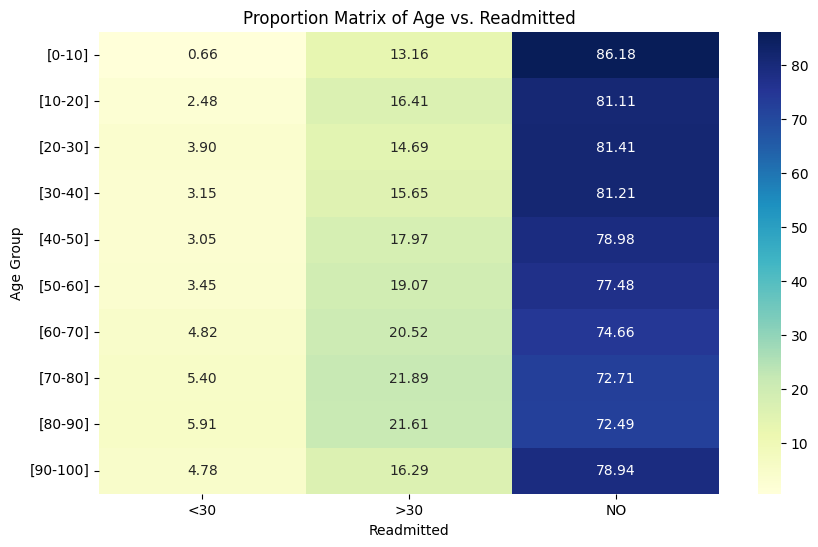

Proportions by Age Group:
               <30        >30         NO
[0-10]    0.657895  13.157895  86.184211
[10-20]   2.480916  16.412214  81.106870
[20-30]   3.898459  14.687217  81.414325
[30-40]   3.145131  15.649867  81.205002
[40-50]   3.052521  17.970971  78.976508
[50-60]   3.453947  19.070724  77.475329
[60-70]   4.819666  20.523905  74.656429
[70-80]   5.400757  21.889692  72.709552
[80-90]   5.905618  21.608989  72.485393
[90-100]  4.777416  16.286645  78.935939


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_matrix contains the raw counts matrix (replace with your actual data)
data = {
    '[0-10]': [1, 20, 131],
    '[10-20]': [13, 86, 425],
    '[20-30]': [43, 162, 898],
    '[30-40]': [83, 413, 2143],
    '[40-50]': [204, 1201, 5278],
    '[50-60]': [420, 2319, 9421],
    '[60-70]': [747, 3181, 11571],
    '[70-80]': [942, 3818, 12682],
    '[80-90]': [657, 2404, 8064],
    '[90-100]': [88, 300, 1454],
}
df_matrix = pd.DataFrame(data, index=['<30', '>30', 'NO']).T

# Normalize by row to get proportions
df_proportions = df_matrix.div(df_matrix.sum(axis=1), axis=0) * 100

# Plot heatmap of proportions
plt.figure(figsize=(10, 6))
sns.heatmap(df_proportions, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Proportion Matrix of Age vs. Readmitted')
plt.xlabel('Readmitted')
plt.ylabel('Age Group')
plt.show()

# Generate insights
print("Proportions by Age Group:")
print(df_proportions)


Plots being too long are commented for easier review of file

In [ ]:

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming df and cat_cols are already defined
# # Example: cat_cols = ['gender', 'age', 'race', ...]

# # Function to create the matrix with proportions
# def create_matrix(df, col):
#     if col in df.columns:
#         matrix = pd.crosstab(df[col], df['readmitted'], normalize='index') * 100  # Normalize by row
#         return matrix
#     else:
#         print(f"Column '{col}' not found in the DataFrame.")
#         return None

# # Dictionary to store all matrices
# matrix_dict = {}

# # Loop through each categorical column
# for col in cat_cols:
#     matrix = create_matrix(df, col)
#     if matrix is not None:
#         matrix_dict[col] = matrix

# # Combine matrices into a single DataFrame for exporting
# combined_matrix = pd.concat(matrix_dict, axis=0)

# # Export to a CSV file
# combined_matrix.to_csv('proportion_matrices.csv')

# # Display heatmaps for each column
# for col, matrix in matrix_dict.items():
#     plt.figure(figsize=(10, 6))
#     sns.heatmap(matrix, annot=True, fmt='.2f', cmap='YlGnBu')  # Format to show percentages
#     plt.title(f'Proportion Matrix of {col} vs. readmitted')
#     plt.xlabel('readmitted')
#     plt.ylabel(col)
#     plt.show()


[Analysis of the representation of these classes](https://drive.google.com/file/d/1RsDldkEnunjGlW259HBOVkjp2SunuE-q/view?usp=sharing)

[Class Representation with respect to target class](https://drive.google.com/file/d/1ZQ7dVlZt2938hs0n6By_6DlhY2QHDmYd/view?usp=sharing)



---



---



# **Analysis**

If the admission of a person is due to court/Law enforcement or due to extramural birth, the person is not readmitted in the hospital.

Similarly if the physian attending the person is from departments like Gynecology
Hospitalist
Obstetrics
Outreach Services
Pediatrics-EmergencyMedicine
Pediatrics-Hematology-Oncology
Pediatrics-Neurology
Pediatrics-Pulmonology
Proctology
Psychiatry-Addictive
Psychiatry-Child/Adolescent
Rheumatology
Speech
Surgery-Colon&Rectal
Surgery-Maxillofacial
SurgicalSpecialty

the person won't be admitted but if the physian is from pediatrics-AllergyandImmunology or from IfectiousDiseases under Pediatrics then the patient will definitely revisit but after 30 days

If patient is prescriped more dosage of nateglinide or a less dose of chlorpropamide then the patient will definitely not revisit the hospital

If the patient is prescribed a steady dose ie asked to continue with acetohexamide then the patient will definitely revisit but after 30 days.

Similarly, if a patient is prescribe low or a high dose of glyburide.metformin or a steady dose of glipizide.metformin then he will definitely not visit the hospital

These insights can be drawn from the data given.



---



---



In [ ]:
drop_list = ['repaglinide', 'nateglinide', 'chlorpropamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone', 'acetohexamide', 'tolbutamide']

In [ ]:
# prompt: print value counts of each variable in drop_list

# Assuming df and drop_list are defined as in the previous code

for col in drop_list:
    if col in df.columns:
        print(f"Value counts for {col}:")
        print(df[col].value_counts())
    else:
        print(f"Column '{col}' not found in the DataFrame.")

Value counts for repaglinide:
repaglinide
No        68220
Steady      841
Up           75
Down         33
Name: count, dtype: int64
Value counts for nateglinide:
nateglinide
No        68696
Steady      446
Up           18
Down          9
Name: count, dtype: int64
Value counts for chlorpropamide:
chlorpropamide
No        69104
Steady       60
Up            4
Down          1
Name: count, dtype: int64
Value counts for acarbose:
acarbose
No        68986
Steady      175
Up            7
Down          1
Name: count, dtype: int64
Value counts for miglitol:
miglitol
No        69150
Steady       17
Up            1
Down          1
Name: count, dtype: int64
Value counts for troglitazone:
troglitazone
No        69167
Steady        2
Name: count, dtype: int64
Value counts for tolazamide:
tolazamide
No        69139
Steady       30
Name: count, dtype: int64
Column 'examide' not found in the DataFrame.
Column 'citoglipton' not found in the DataFrame.
Column 'glyburide-metformin' not found in the DataFr

**Since % representation in each class compared to the other is quite negligible (No and steady considered the same) we drop these variables as then just a single value is repeated**

In [ ]:

cols_to_map = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide.metformin', 'glipizide.metformin', 'metformin.rosiglitazone', 'metformin.pioglitazone']

mapping = {'No': 0, 'Steady': 0, 'Up': 1, 'Down': -1}

for col in cols_to_map:
    if col in df.columns:
        df[col] = df[col].map(mapping).fillna(df[col]) # fillna to handle values not in the mapping

In [ ]:
# prompt: if df[col] from drop_list present drop it

for col in drop_list:
    if col in df.columns:
        df = df.drop(col, axis=1)

In [ ]:
df.shape

(69169, 34)

In [ ]:
# Define known admission type IDs
known_admission_types = [1, 2, 3, 4, 7]

# Replace admission_type_id values not in known_admission_types with NaN
df['admission_type_id'] = df['admission_type_id'].apply(lambda x: x if x in known_admission_types else np.nan)

# Define discharge disposition IDs to replace with NaN
discharge_disposition_ids_to_nan = [18, 25, 26]

# Replace discharge_disposition_id values in the specified list with NaN
df['discharge_disposition_id'] = df['discharge_disposition_id'].apply(lambda x: np.nan if x in discharge_disposition_ids_to_nan else x)

In [ ]:
df['gender'] = df['gender'].replace('Unknown/Invalid', 'Female')
df.gender.value_counts()

,count
gender,
Female,36813
Male,32356


In [ ]:

# Check if discharge_disposition_id values in the specified list have corresponding 'readmitted' values as 'NO'
discharge_disposition_ids_to_check = [11, 13, 14, 19, 20, 21, 23, 24]

# Filter the DataFrame for the specified discharge disposition IDs
filtered_df = df[df['discharge_disposition_id'].isin(discharge_disposition_ids_to_check)]

# Check if all corresponding 'readmitted' values are 'NO'
all_no_readmit = all(filtered_df['readmitted'] == 'NO')

# Print the result
print(f"All 'readmitted' values for discharge_disposition_ids {discharge_disposition_ids_to_check} are 'NO': {all_no_readmit}")


All 'readmitted' values for discharge_disposition_ids [11, 13, 14, 19, 20, 21, 23, 24] are 'NO': False


In [ ]:
# Define discharge disposition IDs to drop
discharge_disposition_ids_to_drop = [11, 13, 14, 19, 20, 21, 23, 24]

# Drop rows where discharge_disposition_id is in the specified list
df = df[~df['discharge_disposition_id'].isin(discharge_disposition_ids_to_drop)]

In [ ]:
df.shape

(68858, 34)

In [ ]:
miss = df.isnull().sum(axis=0) / df.shape[0] * 100
miss = miss.sort_values(ascending = False)
print(miss[miss>0])

medical_specialty           48.062680
admission_type_id           10.405472
discharge_disposition_id     4.304511
race                         2.667809
dtype: float64


In [ ]:

def map_admission_source(source_id):
  if source_id in [1, 2, 3,24]:
    return "Referrals"
  elif source_id in [4, 5, 6,10,18, 19, 22, 23,25,26]:
    return "Transfers"
  elif source_id in [7, 8]:
    return "Emergency"
  elif source_id in [11, 12, 13, 14]:
    return "Babies"
  elif source_id in [9,15,17, 20, 21]:
    return np.nan

# Apply the mapping function to the 'admission_source_id' column
df['admission_source_id'] = df['admission_source_id'].apply(map_admission_source)

In [ ]:

# Impute 'admission_type_id', 'discharge_disposition_id', and 'race' with their respective modes
for col in ['admission_type_id', 'discharge_disposition_id', 'race','admission_source_id']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
miss = df.isnull().sum(axis=0) / df.shape[0] * 100
miss = miss.sort_values(ascending = False)
print(miss[miss>0])

medical_specialty    48.06268
dtype: float64


In [ ]:
# Compare distributions of another variable (e.g., admission source) for missing vs. non-missing
missing_group = df[df['medical_specialty'].isna()]
non_missing_group = df[df['medical_specialty'].notna()]

print(missing_group['readmitted'].value_counts(normalize=True))
print(non_missing_group['readmitted'].value_counts(normalize=True))


readmitted
NO     0.732679
>30    0.219852
<30    0.047469
Name: proportion, dtype: float64
readmitted
NO     0.770629
>30    0.183989
<30    0.045382
Name: proportion, dtype: float64


# **MCAR** As proportions are more or less similar

In [ ]:
df['readmitted'].value_counts()

,count
readmitted,
NO,51808
>30,13856
<30,3194


In [ ]:
# prompt: apply label encoder to all act_cols except medical speciality
df['readmitted'] = df['readmitted'].replace('<30', 'Yes')
df['readmitted'] = df['readmitted'].replace('>30', 'NO')

from sklearn.preprocessing import LabelEncoder

act_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed', 'readmitted', 'diag_1_name','diag_2_name','diag_3_name']

le = LabelEncoder()
for col in act_cols:
  if col != 'medical_specialty' and col in df.columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Original age groups
age_groups = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)',
              '[70-80)', '[80-90)', '[90-100)']

# Mapping of age groups to bins
bin_mapping = {
    '[0-10)': '0-40', '[10-20)': '0-40', '[20-30)': '0-40', '[30-40)': '0-40',
    '[40-50)': '40-70', '[50-60)': '40-70', '[60-70)': '40-70',
    '[70-80)': '70+', '[80-90)': '70+', '[90-100)': '70+'
}

# Encode the bins
encoding = {'0-40': 0, '40-70': 1, '70+': 2}

# Apply binning and encoding
df['binned'] = df['age'].map(bin_mapping)
df['age'] = df['binned'].map(encoding)

In [ ]:
df['age'].value_counts()

,count
age,
1,34218
2,30224
0,4416


In [ ]:
df = df.drop('binned', axis=1)

In [ ]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,glyburide.metformin,glipizide.metformin,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted,diag_1_name,diag_2_name,diag_3_name
0,2,0,0,0,0,2,1,Pediatrics-Endocrinology,41,0,...,0,0,0,0,1,0,0,2,0,0
1,2,0,0,0,0,1,3,NaN,59,0,...,0,0,0,0,0,1,0,0,2,0
2,0,0,0,0,0,1,2,NaN,11,5,...,0,0,0,0,1,1,0,0,2,0
3,2,1,0,0,0,1,2,NaN,44,1,...,0,0,0,0,0,1,0,0,2,1
4,2,1,1,0,0,1,1,NaN,51,0,...,0,0,0,0,0,1,0,7,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69164,0,1,2,0,2,1,3,NaN,51,0,...,0,0,0,0,0,1,0,2,0,1
69165,0,0,2,0,3,3,5,NaN,33,3,...,0,0,0,0,1,1,0,3,0,3
69166,2,1,2,0,0,1,1,NaN,53,0,...,0,0,0,0,0,1,0,0,4,0
69167,2,0,2,1,2,1,10,Surgery-General,45,2,...,0,0,0,0,0,1,0,5,0,5


In [ ]:
num_cols

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

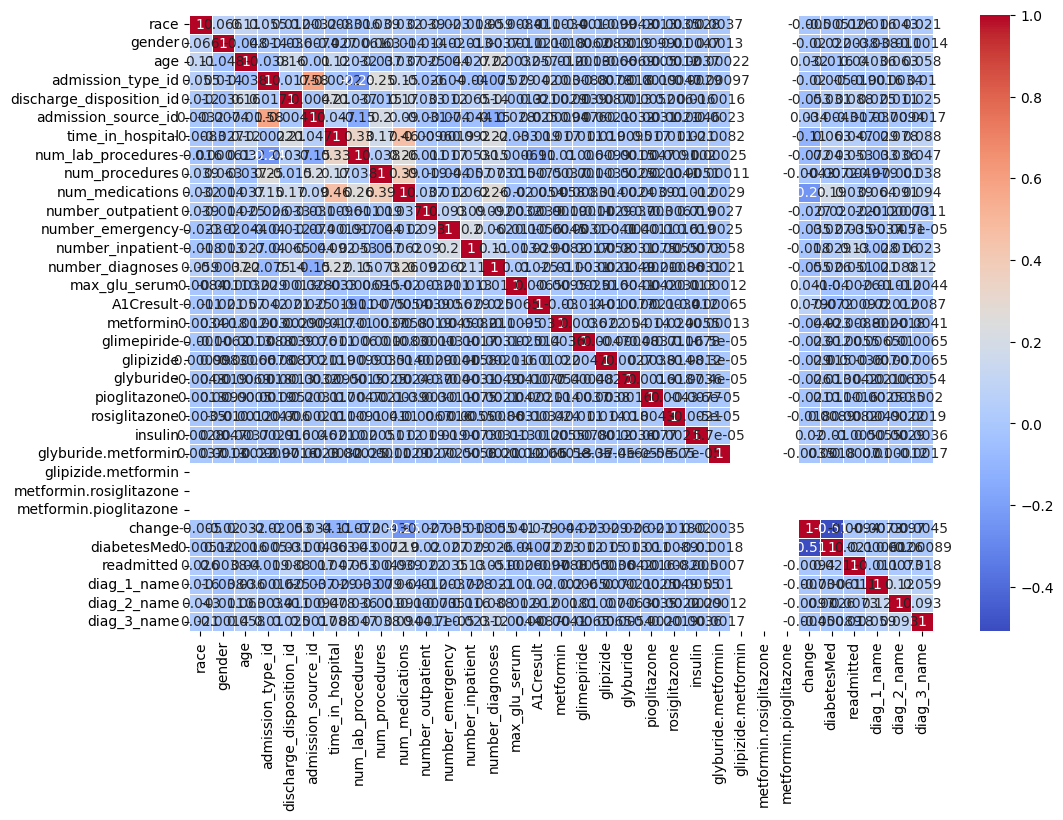

In [ ]:
import seaborn as sns
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [ ]:

correlation_matrix = numeric_df.corr()

# Check for correlation coefficients > 0.8 in absolute value
correlation_threshold = 0.8
high_correlations = []

for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2:
          if abs(correlation_matrix.loc[col1, col2]) > correlation_threshold:
              high_correlations.append((col1, col2, correlation_matrix.loc[col1, col2]))

if high_correlations:
    print("Correlation coefficients > 0.8 (absolute value):")
    for col1, col2, correlation in high_correlations:
        print(f"  {col1} and {col2}: {correlation:.4f}")
else:
  print("No correlation coefficients > 0.8 (absolute value)")

Correlation coefficients > 0.8 (absolute value):
  insulin and dm: 0.8735
  dm and insulin: 0.8735


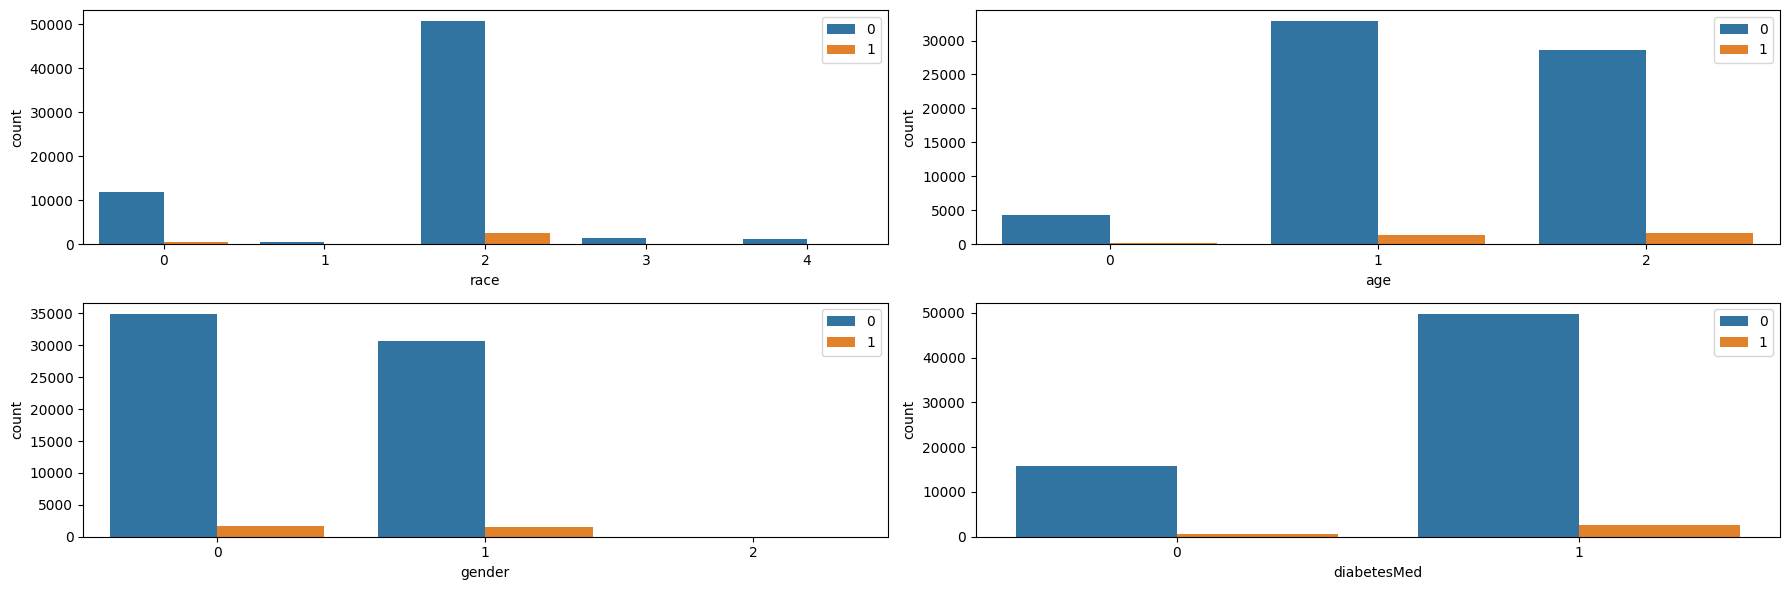

In [ ]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=df, x='race', hue='readmitted', ax=ax1)
sns.countplot(data=df, x='age', hue='readmitted', ax=ax2)
sns.countplot(data=df, x='gender', hue='readmitted', ax=ax3)
sns.countplot(data=df, x='diabetesMed', hue='readmitted', ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()
# readmitted: 0 = No, 1 = >30, 2 = <30

* readmittion has simmilar distripution across different races.
* Very few cases of readmition for youbnger patients (< 40).
* Females have slightly higher rate of no readmittion than males.
* readmittion has simmilar distripution for patients with and without prescribed diabetes medications prior to hospital encounter.



---



# **Q2**

In [ ]:
import pandas as pd

# Identify the target and predictors
target = 'medical_specialty'
predictors = df.drop(columns=[target])

data_non_missing = df.dropna(subset=[target])
X = data_non_missing.drop(columns=[target])
y = data_non_missing[target]

from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
X_encoded = X.apply(LabelEncoder().fit_transform)
y_encoded = LabelEncoder().fit_transform(y)

# Apply chi-square test
chi_scores = chi2(X_encoded, y_encoded)
selected_features = X.columns[chi_scores[1] < 0.05]  # Select features with p-value < 0.05
X_selected = X[selected_features]


In [ ]:
X_selected.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'A1Cresult', 'change', 'readmitted', 'diag_1_name',
       'diag_2_name', 'diag_3_name'],
      dtype='object')

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming X_selected is the dataframe with selected features

# Identify numerical and categorical columns
num_cols = X_selected.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X_selected.select_dtypes(include=['object']).columns

# Preprocess data: Scale numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

# Apply preprocessing and PCA in a pipeline
pca_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=5))  # You can specify the number of components you want
])

# Apply the pipeline to the selected features
X_pca = pca_pipeline.fit_transform(X_selected)

# X_pca now contains the transformed features in the principal component space
X_pca

array([[-3.85882718, -0.60407514, -0.93678822,  0.47103842, -0.56128082],
       [ 2.44651296,  3.10225211,  0.58435406, -1.3858629 , -0.66495883],
       [ 2.32410161, -0.61462504, -0.14983761, -0.47150217,  1.41691281],
       ...,
       [ 3.14625437, -0.2153912 , -0.72356265, -0.30419437,  0.90853658],
       [ 1.28094305,  2.12379419,  1.95838769,  0.10068443, -1.13657231],
       [ 2.47464919,  0.06865216,  0.4770782 , -0.53931321, -0.45352841]])

In [ ]:
num_cols

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'A1Cresult', 'change', 'readmitted', 'diag_1_name',
       'diag_2_name', 'diag_3_name'],
      dtype='object')

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data_with_missing = df[df[target].isnull()]
data_without_missing = df.dropna(subset=[target])

# Separate features (X) and target (y)
X_train = data_without_missing.drop(columns=[target])
y_train = data_without_missing[target]

# Apply PCA to the training features (X_train) to reduce dimensionality
X_train_pca = pca_pipeline.transform(X_train)

# Train a classifier (e.g., Random Forest) using the transformed features
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_pca, y_train)

# Now, predict the missing values using the classifier
X_test = data_with_missing.drop(columns=[target])
X_test_pca = pca_pipeline.transform(X_test)

# Predict the categorical target values for the rows with missing target values
predicted_target = clf.predict(X_test_pca)

# Fill the missing values in the target column with the predicted values
df.loc[df[target].isnull(), target] = predicted_target


Accuracy: 0.4000
F1-score: 0.3401
Confusion Matrix:
 [[  0   0   1 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0 332 ...   2   0   1]
 ...
 [  0   0  30 ...   1   0   1]
 [  0   0   0 ...   0   0   0]
 [  0   0   8 ...   0   0   5]]


In [ ]:
df['medical_specialty'].value_counts()

,count
medical_specialty,
InternalMedicine,29683
Emergency/Trauma,8767
Family/GeneralPractice,7561
Cardiology,7539
Surgery-General,2944
...,...
Pediatrics-AllergyandImmunology,1
Perinatology,1
Neurophysiology,1


In [ ]:
# Calculate the percentage of each medical specialty
specialty_counts = df['medical_specialty'].value_counts(normalize=True) * 100

# Identify specialties with less than 5% representation
specialties_to_combine = specialty_counts[specialty_counts < 5].index

# Replace those specialties with "Other"
df.loc[df['medical_specialty'].isin(specialties_to_combine), 'medical_specialty'] = 'Other'

# Verify the changes (optional)
print(df['medical_specialty'].value_counts())

# ... (Rest of your code)

medical_specialty
InternalMedicine          29683
Other                     15308
Emergency/Trauma           8767
Family/GeneralPractice     7561
Cardiology                 7539
Name: count, dtype: int64


In [ ]:
le = LabelEncoder()
df['medical_specialty'] = le.fit_transform(df['medical_specialty'])




---



# **Q3**

**Handling missing values**

Plots being too long are commented for easier review of file

In [ ]:
# num_cols_1 =  [col for col in df.columns if df[col].dtype != 'object']
# for col in num_cols_1:
#     plt.figure(figsize=(8, 4))
#     sns.boxplot(df[col])
#     plt.title(f'Box Plot of {col}')
#     plt.show()

In [ ]:

# Calculate the percentage of outliers for specified columns
for col in ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_percentage = (len(outliers) / len(df)) * 100

        print(f"Column: {col}")
        print(f"Percentage of outliers: {outlier_percentage:.2f}%")
        print("-" * 20)

Column: time_in_hospital
Percentage of outliers: 2.08%
--------------------
Column: num_lab_procedures
Percentage of outliers: 0.15%
--------------------
Column: num_procedures
Percentage of outliers: 5.22%
--------------------
Column: num_medications
Percentage of outliers: 2.63%
--------------------
Column: number_outpatient
Percentage of outliers: 14.59%
--------------------
Column: number_emergency
Percentage of outliers: 8.92%
--------------------
Column: number_inpatient
Percentage of outliers: 4.25%
--------------------
Column: number_diagnoses
Percentage of outliers: 0.33%
--------------------


In [ ]:
# Assuming df is your DataFrame
df = df.drop(['diag_2_name', 'diag_3_name'], axis=1)

In [ ]:
y = df['readmitted']
X = df.drop(['readmitted'], axis=1)

In [ ]:
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=101)

In [ ]:
sc_X = StandardScaler()

Xsc_train = sc_X.fit_transform(X_train)
Xsc_val = sc_X.fit_transform(X_val)
Xsc_test = sc_X.fit_transform(X_test)

In [ ]:
df.shape

(68858, 32)

In [ ]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'glyburide.metformin',
       'glipizide.metformin', 'metformin.rosiglitazone',
       'metformin.pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'diag_1_name'],
      dtype='object')


Gradient Boost [1] Performance:
-----------------------------------
F1 Score micro        :  0.9548358989253558
F1 Score macro        :  0.49164128092726056
Confusion Matrix:
 [[13148     0]
 [  622     2]]


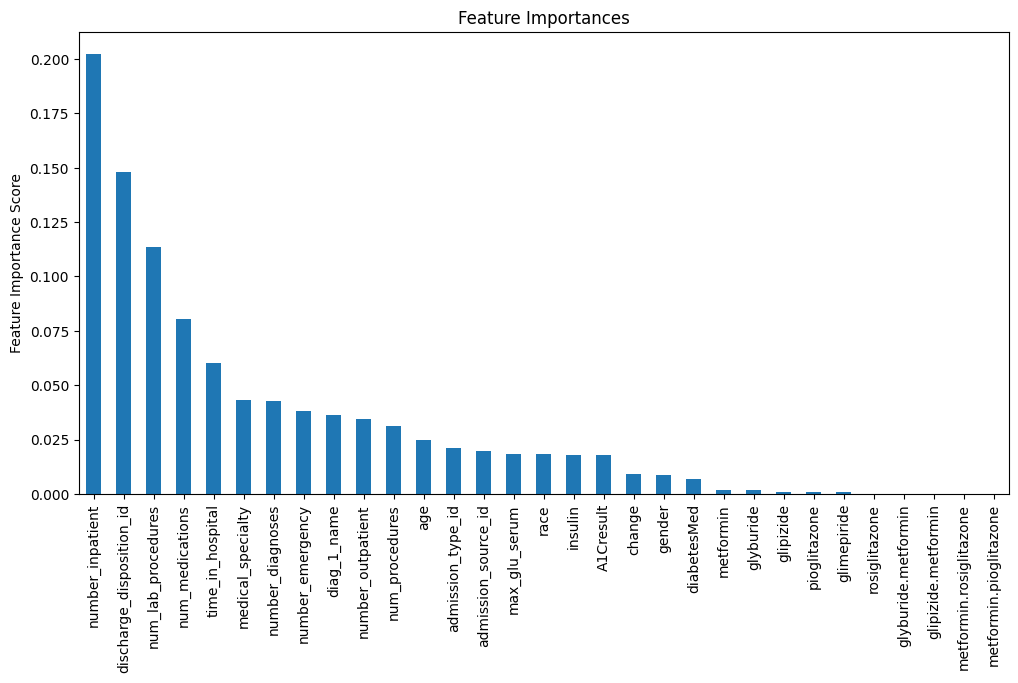

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt

# Separate features (X) and target (y) from the DataFrame
y = df['readmitted']   # Target variable
X = df.drop(columns=['readmitted'])  # Features by dropping the target column

# Define predictors dynamically from X
predictors = X.columns

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=101)

# Initialize and train the Gradient Boosting Classifier
gbm1 = GradientBoostingClassifier(max_depth=12, max_features=10, min_samples_leaf=70,
                                   min_samples_split=800, n_estimators=70,
                                   random_state=101, subsample=0.8)
gbm1.fit(X_train, y_train)

# Make predictions
gbm1_pred = gbm1.predict(X_val)

# Evaluate the model
print('\nGradient Boost [1] Performance:')
print('-----------------------------------')
print('F1 Score micro        : ', f1_score(y_val, gbm1_pred, average='micro'))
print('F1 Score macro        : ', f1_score(y_val, gbm1_pred, average='macro'))
print('Confusion Matrix:\n', confusion_matrix(y_val, gbm1_pred))

# Feature importance plot
feat_imp = pd.Series(gbm1.feature_importances_, index=predictors).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()


Macro and micro values are not balanced
hence change the hyperparamters for feature selection


Gradient Boost [1] Performance:
-----------------------------------
F1 Score micro        :  0.9526575660760964
F1 Score macro        :  0.505618086406213
Confusion Matrix:
 [[13108    40]
 [  612    12]]


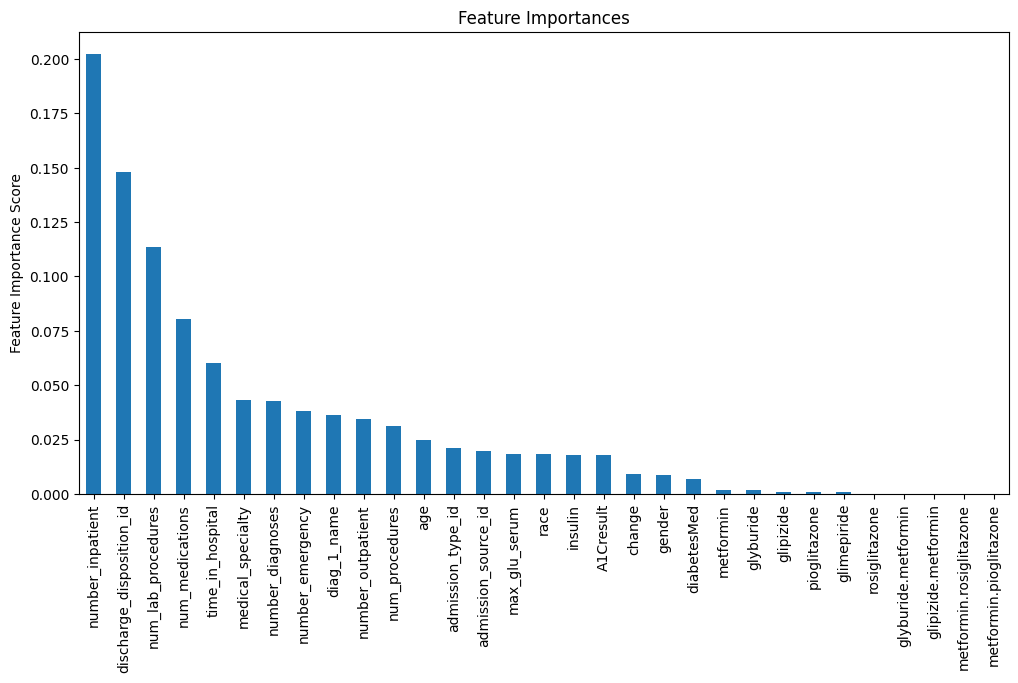

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt

# Separate features (X) and target (y) from the DataFrame
y = df['readmitted']   # Target variable
X = df.drop(columns=['readmitted'])  # Features by dropping the target column

# Define predictors dynamically from X
predictors = X.columns

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=101)

# Initialize and train the Gradient Boosting Classifier
gbm2 = GradientBoostingClassifier(max_depth=12, max_features=18, min_samples_leaf=70,
                           min_samples_split=800, n_estimators=700,
                           random_state=101, subsample=0.85, learning_rate=0.1)
gbm2.fit(X_train,y_train)
gbm2_pred = gbm2.predict(X_val)

# Evaluate the model
print('\nGradient Boost [1] Performance:')
print('-----------------------------------')
print('F1 Score micro        : ', f1_score(y_val, gbm2_pred, average='micro'))
print('F1 Score macro        : ', f1_score(y_val, gbm2_pred, average='macro'))
print('Confusion Matrix:\n', confusion_matrix(y_val, gbm2_pred))

# Feature importance plot
feat_imp = pd.Series(gbm1.feature_importances_, index=predictors).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

In [ ]:
import pandas as pd

# Identify the target and predictors
target = 'readmitted'
predictors = df.drop(columns=[target])

data_non_missing = df.dropna(subset=[target])
X = data_non_missing.drop(columns=[target])
y = data_non_missing[target]

from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
X_encoded = X.apply(LabelEncoder().fit_transform)
y_encoded = LabelEncoder().fit_transform(y)

# Apply chi-square test
chi_scores = chi2(X_encoded, y_encoded)
selected_features = X.columns[chi_scores[1] < 0.05]  # Select features with p-value < 0.05
X_selected = X[selected_features]

In [ ]:
X_selected

,race,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed,diag_1_name
0,2,0,0,0,2,1,4,41,1,0,0,0,1,0,2
1,2,0,0,0,1,3,3,59,18,0,0,0,9,1,0
2,0,0,0,0,1,2,2,11,13,2,0,1,6,1,0
3,2,0,0,0,1,2,1,44,16,0,0,0,7,1,0
4,2,1,0,0,1,1,0,51,8,0,0,0,5,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69164,0,2,0,2,1,3,3,51,16,0,0,0,9,1,2
69165,0,2,0,3,3,5,3,33,18,0,0,1,9,1,3
69166,2,2,0,0,1,1,3,53,9,1,0,0,13,1,0
69167,2,2,1,2,1,10,4,45,21,0,0,1,9,1,5


In [ ]:
df.shape

(68858, 32)

In [ ]:
X_selected.shape

(68858, 15)

In [ ]:
X_selected.columns

Index(['race', 'age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'medical_specialty',
       'num_lab_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'diabetesMed', 'diag_1_name'],
      dtype='object')

<ipython-input-356-63e302491698>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=filtered_importances, palette='viridis')


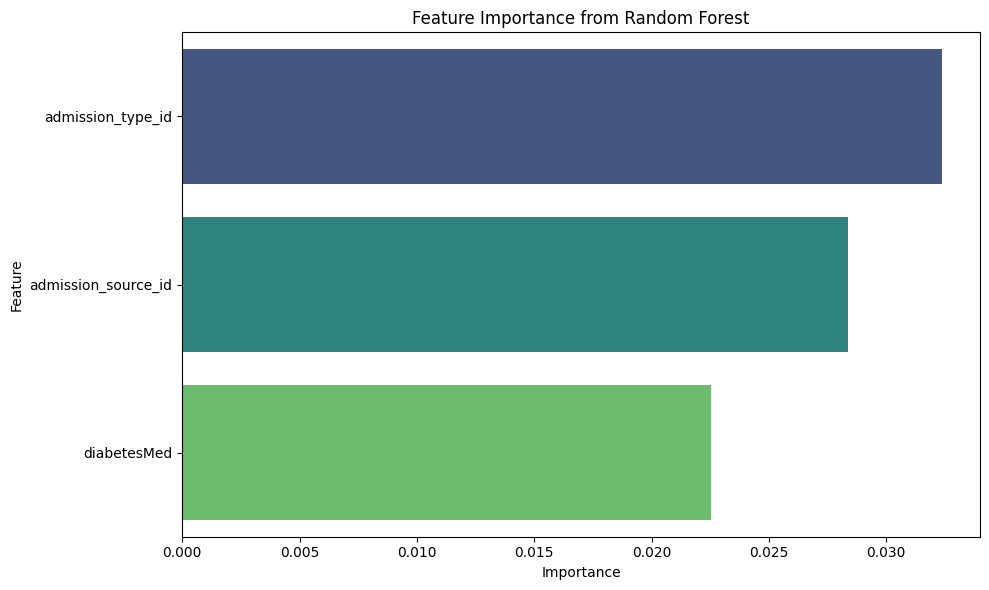

                Feature  Importance
2     admission_type_id    0.032381
4   admission_source_id    0.028360
13          diabetesMed    0.022521


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature selection and encoding
df_encoded = pd.get_dummies(X_selected)

# Features (X) and target (y)
X = df_encoded
y = df['readmitted']

# Train Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X, y)

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Filter features based on the original list (ensure the encoded names are used)
provided_features = [col for col in X.columns if any(f in col for f in ['insulin', 'dm', 'diabetesMed', 'change', 'A1Cresult', 'max_glu_serum'])]
filtered_importances = feature_importances[feature_importances['Feature'].isin(provided_features)]

# Plot the filtered feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=filtered_importances, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()

# Display top features
print(filtered_importances)

#**Another way the feature engg could be done is as follows**
**since the above method does not include A1Cresult column around which readmitted is to be checked**


In [ ]:
df_copy = df.copy()

In [ ]:
# # Create the 'diabetes_medication' column by combining the specified columns
diabetes_cols = ['metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
                 'rosiglitazone', 'insulin', 'glyburide.metformin',
                 'glipizide.metformin', 'metformin.rosiglitazone',
                 'metformin.pioglitazone']

df_copy['diabetes_medication'] = df_copy[diabetes_cols].sum(axis=1)


metformin                  0.284026
glimepiride                0.151424
glipizide                  0.226427
glyburide                  0.241595
pioglitazone               0.114206
rosiglitazone              0.116461
insulin                    0.880355
glyburide.metformin        0.026587
glipizide.metformin             NaN
metformin.rosiglitazone         NaN
metformin.pioglitazone          NaN
Name: diabetes_medication, dtype: float64


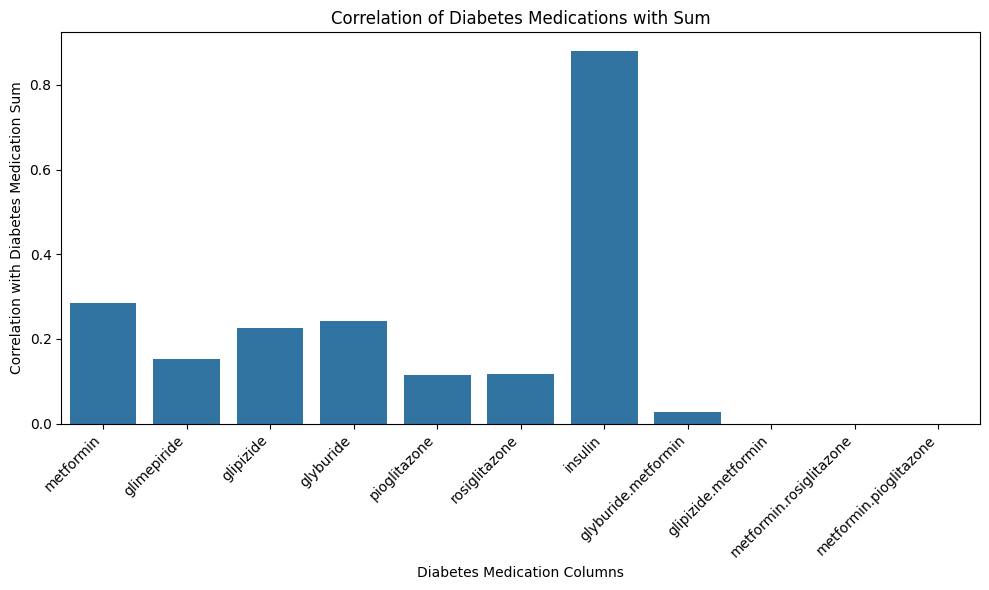

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df and diabetes_cols are already defined as in your provided code

# Calculate the correlation between 'diabetes_medication' and other columns
correlations = df_copy[diabetes_cols + ['diabetes_medication']].corr()['diabetes_medication']

# Remove the self-correlation (correlation of 'diabetes_medication' with itself)
correlations = correlations.drop('diabetes_medication')

# Print or visualize the correlations
print(correlations)

# Visualization using a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Diabetes Medication Columns')
plt.ylabel('Correlation with Diabetes Medication Sum')
plt.title('Correlation of Diabetes Medications with Sum')
plt.tight_layout()
plt.show()

In [ ]:
df_copy['diabetes_medication'].value_counts()

,count
diabetes_medication,
0,52113
1,8147
-1,8098
2,328
-2,153
3,16
-3,3


In [ ]:
cols_to_drop = [col for col in diabetes_cols if col != 'insulin' and col in df_copy.columns]
df_copy = df_copy.drop(cols_to_drop, axis=1)

In [ ]:
# Mapping for diabetes medications
mapping = {-3: -1, -2: -1, -1: -1, 1: 1, 2: 1, 3: 1, 0:0}

df_copy['dm'] = df_copy['diabetes_medication'].map(mapping)

In [ ]:
cols_to_drop = ['diabetes_medication']
df_copy = df_copy.drop(cols_to_drop, axis=1)
df_copy.shape

(68858, 23)

In [ ]:
df_copy = df_copy.drop(['gender', 'race'], axis=1)

In [ ]:


# Assuming df is already loaded and processed as in the previous code
print(df_copy['max_glu_serum'].value_counts())
print(df_copy['insulin'].value_counts())
print(df_copy['change'].value_counts())
print(df_copy['A1Cresult'].value_counts())
print(df_copy['diabetesMed'].value_counts())

max_glu_serum
2    65576
3     1705
0      922
1      655
Name: count, dtype: int64
insulin
 0    54652
-1     7385
 1     6821
Name: count, dtype: int64
change
1    37890
0    30968
Name: count, dtype: int64
A1Cresult
2    56686
1     5783
3     3675
0     2714
Name: count, dtype: int64
diabetesMed
1    52351
0    16507
Name: count, dtype: int64


In [ ]:

# Define the mapping for 'insulin' and 'dm' columns
mapping = {-1: 1, 1: 1, 0: 0}

# Apply the mapping to the 'insulin' and 'dm' columns in the copied DataFrame
df_copy['insulin'] = df_copy['insulin'].map(mapping)
df_copy['dm'] = df_copy['dm'].map(mapping)

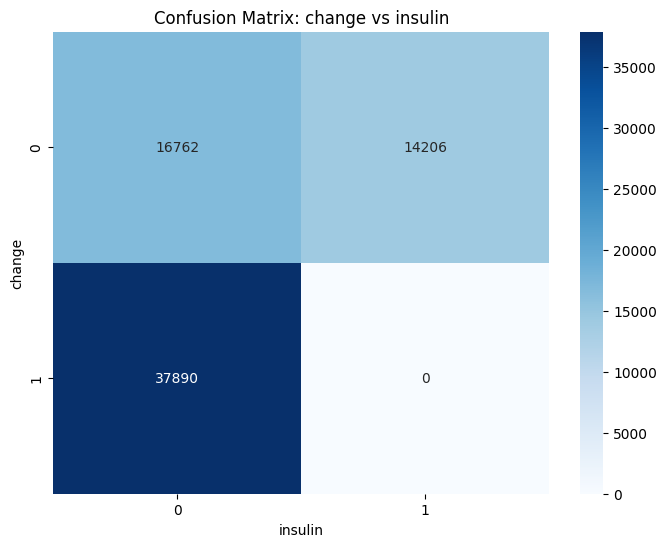

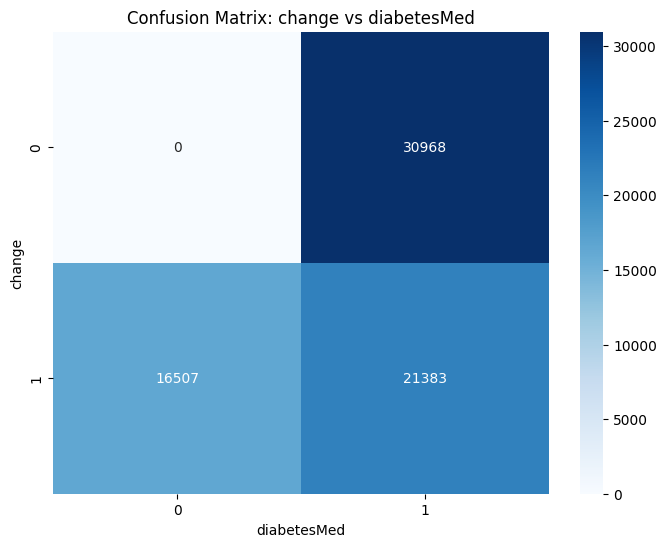

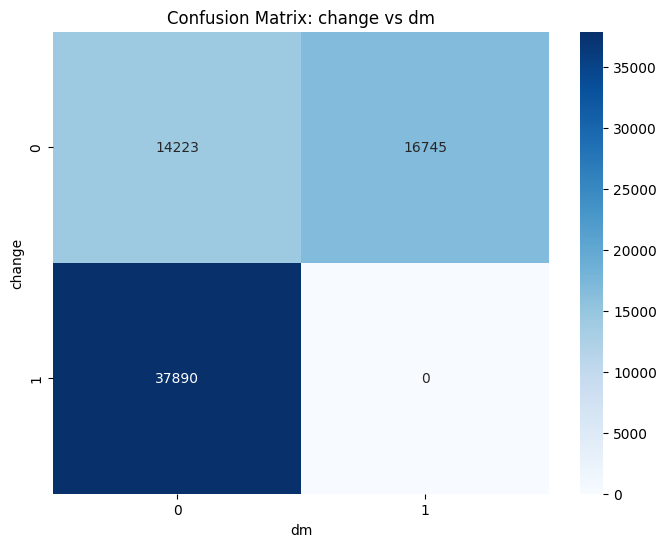

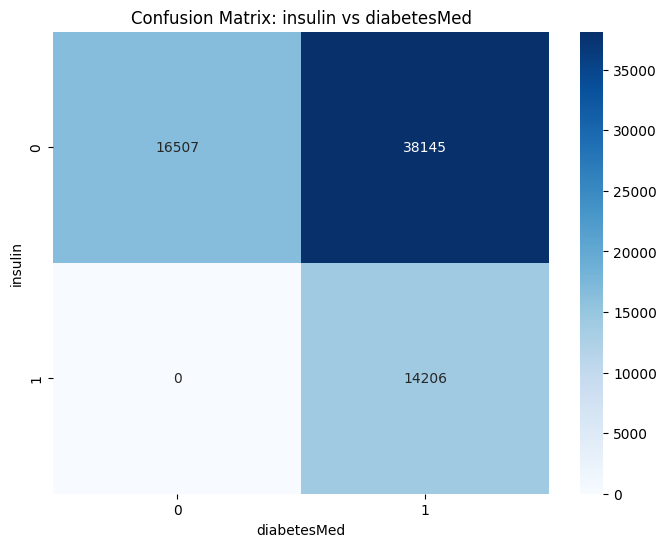

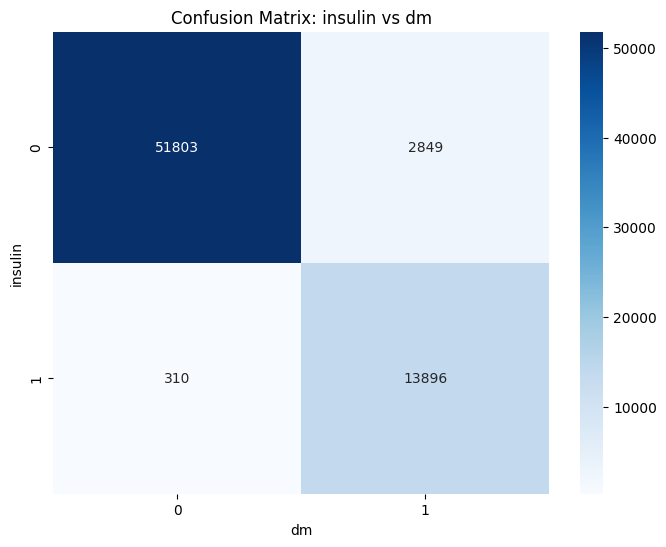

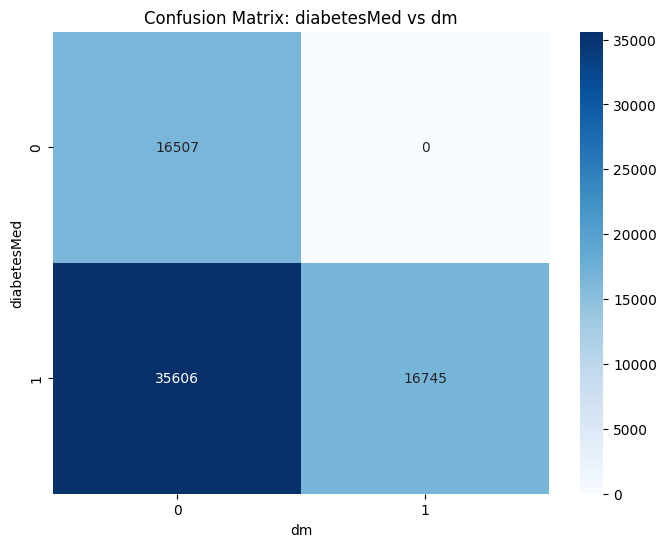

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def create_confusion_matrix(df, col1, col2):
    matrix = pd.crosstab(df[col1], df[col2])
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {col1} vs {col2}')
    plt.xlabel(col2)
    plt.ylabel(col1)
    plt.show()

# Example usage for each pair
create_confusion_matrix(df_copy, 'change', 'insulin')
create_confusion_matrix(df_copy, 'change', 'diabetesMed')
create_confusion_matrix(df_copy, 'change', 'dm')
create_confusion_matrix(df_copy, 'insulin', 'diabetesMed')
create_confusion_matrix(df_copy, 'insulin', 'dm')
create_confusion_matrix(df_copy, 'diabetesMed', 'dm')

In [ ]:
# prompt: print arranged correlation of df.columns with readmitted

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it has been processed as in the previous code.

# Select numerical columns for correlation analysis
numeric_df = df_copy.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Sort the correlations with 'readmitted' in descending order
correlation_with_readmitted = correlation_matrix['readmitted'].sort_values(ascending=False)

# Print the sorted correlation coefficients
print(correlation_with_readmitted)




readmitted                  1.000000
number_inpatient            0.132138
discharge_disposition_id    0.088035
num_lab_procedures          0.052765
number_diagnoses            0.051273
time_in_hospital            0.046916
age                         0.040008
num_medications             0.038580
number_emergency            0.034846
number_outpatient           0.022049
diabetesMed                 0.021461
medical_specialty           0.013574
dm                          0.013565
insulin                     0.011953
A1Cresult                  -0.000966
max_glu_serum              -0.002605
num_procedures             -0.004904
change                     -0.009375
diag_1_name                -0.010864
admission_source_id        -0.017093
admission_type_id          -0.019049
Name: readmitted, dtype: float64


In [ ]:
# prompt: drop 'num_procedures', 'num_lab_procedures'

# Assuming df is your DataFrame and has already been processed as in the provided code.
df_copy = df_copy.drop(['num_procedures', 'num_lab_procedures'], axis=1)


In [ ]:
df_copy.shape

(68858, 19)

In [ ]:
df_copy.columns

Index(['age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'medical_specialty',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'insulin', 'change', 'diabetesMed', 'readmitted', 'diag_1_name', 'dm'],
      dtype='object')

In [ ]:


# Sum 'num_medications' and 'number_diagnoses' to create 'medical_complexity'
df_copy['medical_complexity'] = df_copy['num_medications'] + df_copy['number_diagnoses']

# Combine 'num_inpatients', 'num_outpatient', and 'num_emergency' into 'num_visits'
df_copy['num_visits'] = df_copy['number_inpatient'] + df_copy['number_outpatient'] + df_copy['number_emergency']

# Drop the original columns used for combining
df_copy = df_copy.drop(['num_medications', 'number_diagnoses', 'number_inpatient', 'number_outpatient', 'number_emergency'], axis=1)

<ipython-input-373-fdc85100d992>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=filtered_importances, palette='viridis')


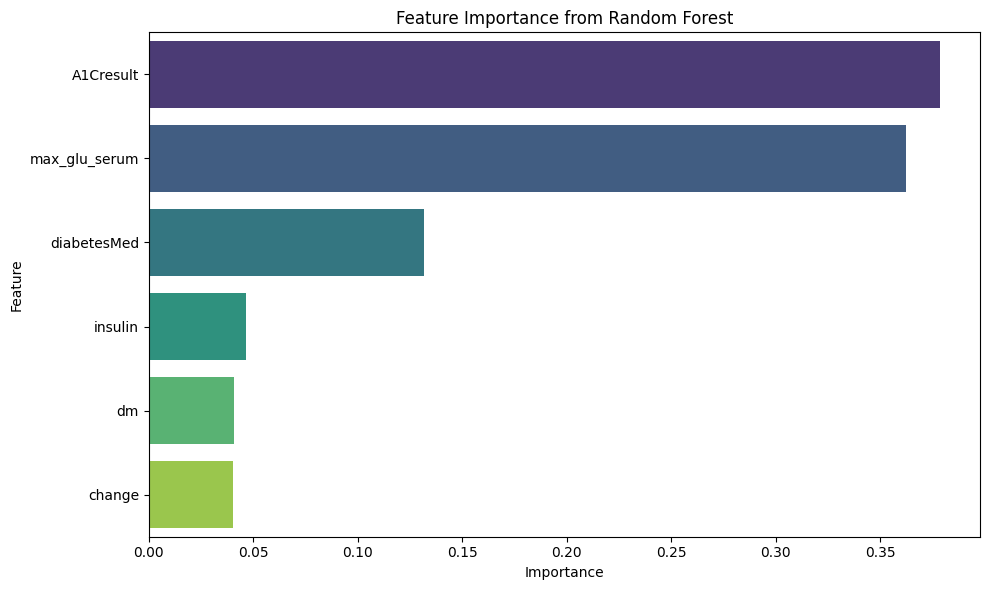

         Feature  Importance
4      A1Cresult    0.378761
5  max_glu_serum    0.362309
2    diabetesMed    0.131573
0        insulin    0.046622
1             dm    0.040658
3         change    0.040077


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature selection and encoding
df_encoded = pd.get_dummies(df_copy[['insulin', 'dm', 'diabetesMed', 'change', 'A1Cresult', 'max_glu_serum']])
df_encoded['readmitted'] = df_copy['readmitted']

# Features (X) and target (y)
X = df_encoded.drop(columns=['readmitted'])
y = df_encoded['readmitted']

# Train Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X, y)

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Filter features based on the original list (ensure the encoded names are used)
provided_features = [col for col in X.columns if any(f in col for f in ['insulin', 'dm', 'diabetesMed', 'change', 'A1Cresult', 'max_glu_serum'])]
filtered_importances = feature_importances[feature_importances['Feature'].isin(provided_features)]

# Plot the filtered feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=filtered_importances, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()

# Display top features
print(filtered_importances)


In [ ]:
df_copy1 = df_copy.copy()

# Define columns to drop in the copy
cols_to_drop_copy1 = ['change', 'dm', 'insulin', 'diabetesMed']

# Drop the specified columns from the copy
df_copy1 = df_copy1.drop(cols_to_drop_copy1, axis=1, errors='ignore')

              precision    recall  f1-score   support

           0       0.97      0.62      0.76     13151
           1       0.07      0.56      0.12       621

    accuracy                           0.62     13772
   macro avg       0.52      0.59      0.44     13772
weighted avg       0.93      0.62      0.73     13772



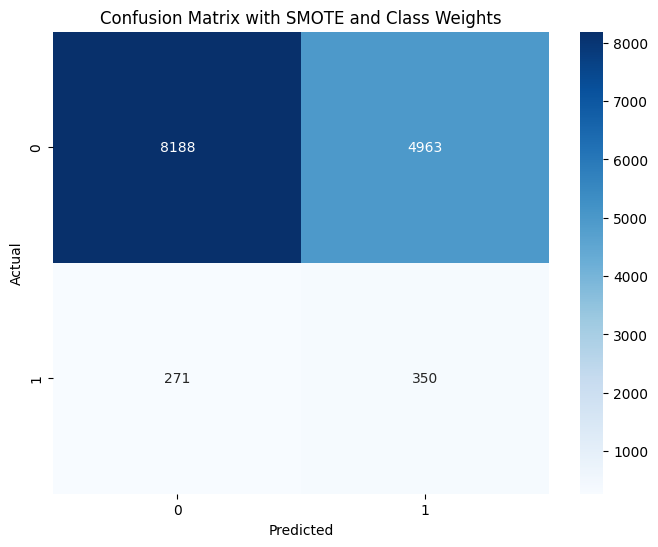

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = df_copy1.drop('readmitted', axis=1)
y = df_copy1['readmitted']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize and train a Logistic Regression model with class weights
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')  # 'balanced' adjusts weights automatically
logreg.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix with SMOTE and Class Weights')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Method 03 to check A1Cresult impact on readmitted**

In [ ]:
df.shape

(68858, 32)

<ipython-input-377-2869880f558b>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


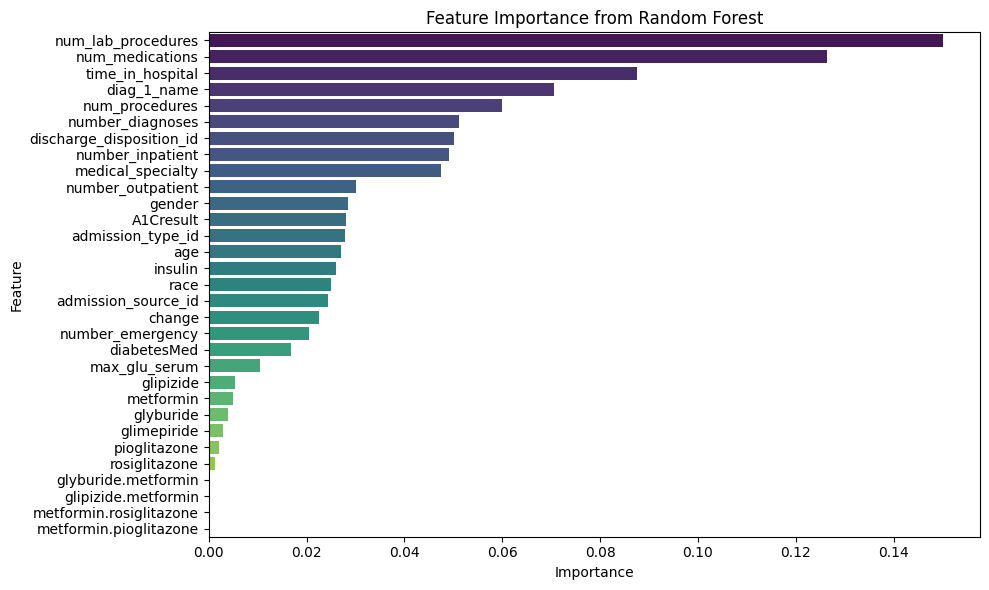

                     Feature  Importance
8         num_lab_procedures    0.150139
10           num_medications    0.126322
6           time_in_hospital    0.087556
30               diag_1_name    0.070652
9             num_procedures    0.060021
14          number_diagnoses    0.051205
4   discharge_disposition_id    0.050161
13          number_inpatient    0.049097
7          medical_specialty    0.047493
11         number_outpatient    0.030151
1                     gender    0.028427
16                 A1Cresult    0.027970
3          admission_type_id    0.027786
2                        age    0.027126
23                   insulin    0.026005
0                       race    0.024923
5        admission_source_id    0.024309
28                    change    0.022493
12          number_emergency    0.020476
29               diabetesMed    0.016798
15             max_glu_serum    0.010450
19                 glipizide    0.005313
17                 metformin    0.004885
20              

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Features (X) and target (y)
X = df.drop(columns=['readmitted'])
y = df['readmitted']

# Train Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X, y)

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


# Plot the filtered feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()

# Display top features
print(feature_importances)


In [ ]:
df_encoded.shape

(68858, 7)

In [ ]:
# prompt: extract the important features having importance greater than 0.025 from above to a list

# Extract features with importance greater than 0.025
important_features = feature_importances[feature_importances['Importance'] > 0]['Feature'].tolist()

important_features

['num_lab_procedures',
 'num_medications',
 'time_in_hospital',
 'diag_1_name',
 'num_procedures',
 'number_diagnoses',
 'discharge_disposition_id',
 'number_inpatient',
 'medical_specialty',
 'number_outpatient',
 'gender',
 'A1Cresult',
 'admission_type_id',
 'age',
 'insulin',
 'race',
 'admission_source_id',
 'change',
 'number_emergency',
 'diabetesMed',
 'max_glu_serum',
 'glipizide',
 'metformin',
 'glyburide',
 'glimepiride',
 'pioglitazone',
 'rosiglitazone',
 'glyburide.metformin']

In [ ]:
# prompt: find common columns of imp features and X_selected

# Assuming X_selected and important_features are defined as in your provided code.

common_cols = list(set(X_selected.columns) & set(important_features))
common_cols

['number_inpatient',
 'discharge_disposition_id',
 'age',
 'diag_1_name',
 'number_emergency',
 'num_lab_procedures',
 'time_in_hospital',
 'medical_specialty',
 'number_outpatient',
 'race',
 'admission_source_id',
 'num_medications',
 'admission_type_id',
 'diabetesMed',
 'number_diagnoses']

In [ ]:
min_importance_col = feature_importances.loc[feature_importances['Feature'].isin(common_cols)].sort_values(by='Importance', ascending=True).iloc[0]['Feature']

print(f"The column with the lowest feature importance score among common_cols is: {min_importance_col}")

The column with the lowest feature importance score among common_cols is: diabetesMed


In [ ]:
# prompt: from feature importance select all features having importance greater than diabetesMed

# Assuming feature_importances DataFrame is available from the previous code.
# It should have columns 'Feature' and 'Importance'.

diabetesMed_importance = feature_importances[feature_importances['Feature'] == 'diabetesMed']['Importance'].iloc[0]

# Select features with importance greater than diabetesMed's importance
selected_features = feature_importances[feature_importances['Importance'] >= diabetesMed_importance]['Feature'].tolist()

selected_features

['num_lab_procedures',
 'num_medications',
 'time_in_hospital',
 'diag_1_name',
 'num_procedures',
 'number_diagnoses',
 'discharge_disposition_id',
 'number_inpatient',
 'medical_specialty',
 'number_outpatient',
 'gender',
 'A1Cresult',
 'admission_type_id',
 'age',
 'insulin',
 'race',
 'admission_source_id',
 'change',
 'number_emergency',
 'diabetesMed']

In [ ]:
# prompt: find length of selected features

len(selected_features)

20

In [ ]:
# df_copy1.shape

In [ ]:
#df_encoded.columns

In [ ]:
# prompt: club 'num_lab_procedures' and 'num_procedures' as total_procedures
# make a new col visit_time = ('number_inpatient' +
#  'number_outpatient')* 'time_in_hospital'
# drop the columns used
df_use = df[selected_features]
import pandas as pd

# Assuming your DataFrame is named 'df'
# Create 'total_procedures' column
df_use['total_procedures'] = df_use['num_lab_procedures'] + df_use['num_procedures']

# Create 'visit_time' column
df_use['visit_time'] = (df_use['number_inpatient'] + df_use['number_outpatient']) * df_use['time_in_hospital']

# Drop the original columns
df_use = df_use.drop(['num_lab_procedures', 'num_procedures', 'number_inpatient', 'number_outpatient','time_in_hospital'], axis=1)

<ipython-input-386-6a951335a8e1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use['total_procedures'] = df_use['num_lab_procedures'] + df_use['num_procedures']
<ipython-input-386-6a951335a8e1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use['visit_time'] = (df_use['number_inpatient'] + df_use['number_outpatient']) * df_use['time_in_hospital']


In [ ]:
df_use.columns

Index(['num_medications', 'diag_1_name', 'number_diagnoses',
       'discharge_disposition_id', 'medical_specialty', 'gender', 'A1Cresult',
       'admission_type_id', 'age', 'insulin', 'race', 'admission_source_id',
       'change', 'number_emergency', 'diabetesMed', 'total_procedures',
       'visit_time'],
      dtype='object')

In [ ]:
df_use.shape

(68858, 17)

In [ ]:

# Club categorical columns
df_use['patient_look'] = df_use['race'].astype(str) + '_' + df_use['age'].astype(str) + '_' + df_use['gender'].astype(str)
df_use['Medication'] = df_use['diabetesMed'].astype(str) + '_' + df_use['change'].astype(str) + '_' + df_use['insulin'].astype(str)
df_use['ID'] = df_use['discharge_disposition_id'].astype(str) + '_' + df_use['admission_source_id'].astype(str) + '_' + df_use['admission_type_id'].astype(str)

# Drop the original columns
df_use = df_use.drop(['race', 'age', 'gender', 'diabetesMed', 'change', 'insulin', 'discharge_disposition_id', 'admission_source_id', 'admission_type_id'], axis=1)

In [ ]:
df_use.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68858 entries, 0 to 69168
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   num_medications    68858 non-null  int64 
 1   diag_1_name        68858 non-null  int64 
 2   number_diagnoses   68858 non-null  int64 
 3   medical_specialty  68858 non-null  int64 
 4   A1Cresult          68858 non-null  int64 
 5   number_emergency   68858 non-null  int64 
 6   total_procedures   68858 non-null  int64 
 7   visit_time         68858 non-null  int64 
 8   patient_look       68858 non-null  object
 9   Medication         68858 non-null  object
 10  ID                 68858 non-null  object
dtypes: int64(8), object(3)
memory usage: 6.3+ MB


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.64      0.77     13151
           1       0.06      0.49      0.11       621

    accuracy                           0.64     13772
   macro avg       0.51      0.56      0.44     13772
weighted avg       0.92      0.64      0.74     13772



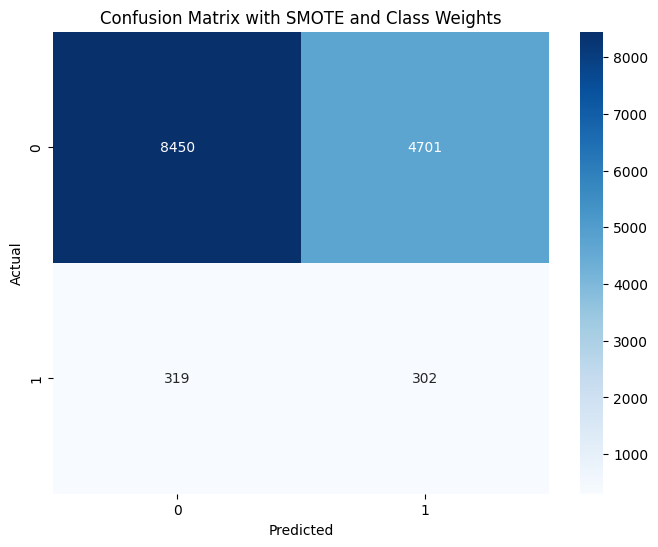

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = df_use.copy()  # Ensure X is independent and does not modify df_use
y = df['readmitted']

# Apply LabelEncoder to categorical columns in X
label_encoders = {}
categorical_columns = X.select_dtypes(include=['object', 'category']).columns  # Detect categorical columns

for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Encode the column
    label_encoders[col] = le  # Store the encoder for potential inverse transformation or analysis

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize and train a Logistic Regression model with class weights
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')  # 'balanced' adjusts weights automatically
logreg.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix with SMOTE and Class Weights')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.64      0.77     13151
           1       0.06      0.49      0.11       621

    accuracy                           0.64     13772
   macro avg       0.51      0.56      0.44     13772
weighted avg       0.92      0.64      0.74     13772



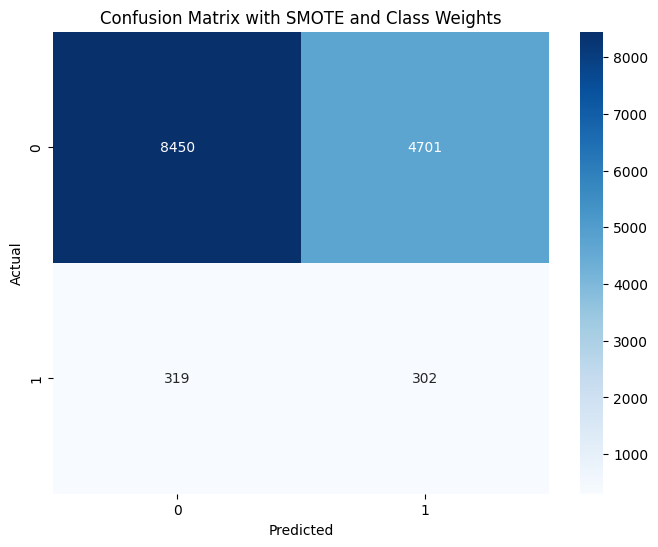

In [ ]:
# prompt: apply logistic regression on above

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


# Assuming df_use and y are defined as in your previous code

# Define features (X) and target (y)
X = df_use.copy()
y = df['readmitted']
label_encoders = {}
categorical_columns = X.select_dtypes(include=['object', 'category']).columns  # Detect categorical columns

for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Encode the column
    label_encoders[col] = le  # Store the encoder for potential inverse transformation or analysis

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize and train a Logistic Regression model with class weights
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix with SMOTE and Class Weights')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
df_copy.columns

Index(['age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'medical_specialty',
       'max_glu_serum', 'A1Cresult', 'insulin', 'change', 'diabetesMed',
       'readmitted', 'diag_1_name', 'dm', 'medical_complexity', 'num_visits'],
      dtype='object')

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     13151
           1       0.06      0.01      0.01       621

    accuracy                           0.95     13772
   macro avg       0.51      0.50      0.49     13772
weighted avg       0.91      0.95      0.93     13772



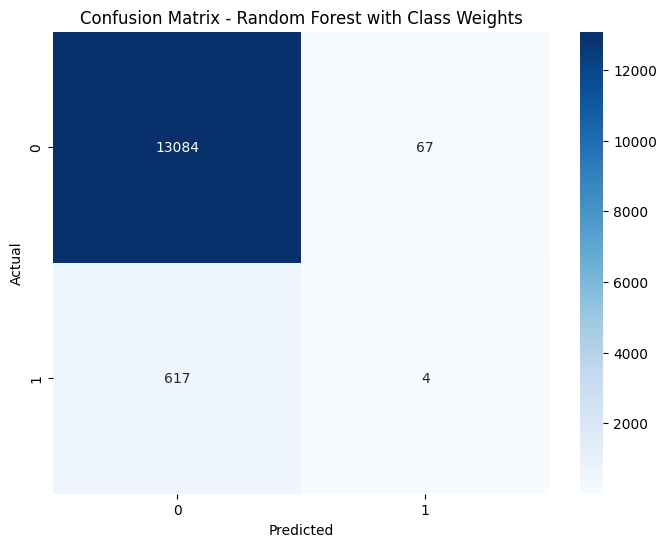

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = df_copy.drop('readmitted', axis=1)
y = df_copy['readmitted']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier with class weights
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest with Class Weights')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
## Q4
# def create_confusion_matrix(df, col1, col2):
#     matrix = pd.crosstab(df[col1], df[col2])
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
#     plt.title(f'Confusion Matrix: {col1} vs {col2}')
#     plt.xlabel(col2)
#     plt.ylabel(col1)
#     plt.show()

# # Example usage for 'A1Cresult' and 'change'
# create_confusion_matrix(df, 'A1Cresult', 'change')

In [ ]:
df.columns


Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'glyburide.metformin',
       'glipizide.metformin', 'metformin.rosiglitazone',
       'metformin.pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'diag_1_name'],
      dtype='object')

In [ ]:
# Scale numeric features only
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
print("Balanced Dataset Summary:")
print(df_copy['readmitted'].value_counts())

Balanced Dataset Summary:
readmitted
0    65664
1     3194
Name: count, dtype: int64


In [ ]:
df_copy1 = df_copy

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Step 3: Filter by primary diagnosis (e.g., 'diag_1_name' for specific disease focus)
df_filtered = df_copy1[df_copy1['diag_1_name'] == 2]  # Ensure you reference the correct dataframe

# Step 4: Encode categorical variables ('A1Cresult', 'Sex', etc.)
le = LabelEncoder()

# Encode A1Cresult (HbA1c levels)
df_filtered['A1Cresult'] = le.fit_transform(df_filtered['A1Cresult'])

# Step 5: Select relevant features (e.g., A1Cresult, Age, Sex)
X = df_filtered[['age', 'admission_type_id', 'discharge_disposition_id',
                 'admission_source_id', 'time_in_hospital', 'medical_specialty',
                 'max_glu_serum', 'A1Cresult', 'medical_complexity', 'num_visits']]  # Add more features as necessary

# Encoding any categorical features using LabelEncoder as needed
# Ensure all features are numeric now

# Add constant term for intercept in the model
X = sm.add_constant(X)

# Define the target variable (y)
y = df_filtered['readmitted']

# Step 6: Fit Logistic Regression Model
model = sm.Logit(y, X)
result = model.fit()

# Step 7: Model Summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.181815
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             readmitted   No. Observations:                 5570
Model:                          Logit   Df Residuals:                     5559
Method:                           MLE   Df Model:                           10
Date:                Sun, 12 Jan 2025   Pseudo R-squ.:                 0.06793
Time:                        14:50:20   Log-Likelihood:                -1012.7
converged:                       True   LL-Null:                       -1086.5
Covariance Type:            nonrobust   LLR p-value:                 1.157e-26
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.6144      0.508     -9.091      0.000      -5.609

<ipython-input-400-7ad814773bea>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['A1Cresult'] = le.fit_transform(df_filtered['A1Cresult'])


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
model = sm.Logit(y_train, X_train)
result = model.fit()

# Check the model summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.178231
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             readmitted   No. Observations:                 3899
Model:                          Logit   Df Residuals:                     3888
Method:                           MLE   Df Model:                           10
Date:                Sun, 12 Jan 2025   Pseudo R-squ.:                 0.07764
Time:                        14:50:20   Log-Likelihood:                -694.92
converged:                       True   LL-Null:                       -753.42
Covariance Type:            nonrobust   LLR p-value:                 2.069e-20
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.9383      0.607     -8.136      0.000      -6.128

In [ ]:
y_pred_prob = result.predict(X_test)  # Predict probabilities

# Convert probabilities to class labels based on a threshold (e.g., 0.5)
y_pred = (y_pred_prob >= 0.5).astype(int)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1}")

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{cm}")


Accuracy: 0.9497307001795332
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC AUC Score: 0.6688683349836468
Confusion Matrix: 
[[1587    0]
 [  84    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Tune threshold to maximize precision-recall trade-off if necessary
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Example: Find the threshold where precision and recall are balanced
optimal_idx = np.argmax(2 * precision * recall / (precision + recall))
optimal_threshold = thresholds[optimal_idx]


<ipython-input-405-4300d7f198a8>:7: RuntimeWarning: invalid value encountered in divide
  optimal_idx = np.argmax(2 * precision * recall / (precision + recall))


In [ ]:
# Use the optimal threshold to make predictions
y_pred_optimized = (y_pred_prob >= optimal_threshold).astype(int)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Accuracy
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Accuracy: {accuracy_optimized}")

# Precision
precision_optimized = precision_score(y_test, y_pred_optimized)
print(f"Optimized Precision: {precision_optimized}")

# Recall
recall_optimized = recall_score(y_test, y_pred_optimized)
print(f"Optimized Recall: {recall_optimized}")

# F1-Score
f1_optimized = f1_score(y_test, y_pred_optimized)
print(f"Optimized F1-Score: {f1_optimized}")

# ROC AUC Score
roc_auc_optimized = roc_auc_score(y_test, y_pred_prob)
print(f"Optimized ROC AUC Score: {roc_auc_optimized}")

# Confusion Matrix
cm_optimized = confusion_matrix(y_test, y_pred_optimized)
print(f"Optimized Confusion Matrix: \n{cm_optimized}")


Optimized Accuracy: 0.9461400359066428
Optimized Precision: 0.0
Optimized Recall: 0.0
Optimized F1-Score: 0.0
Optimized ROC AUC Score: 0.6688683349836468
Optimized Confusion Matrix: 
[[1581    6]
 [  84    0]]


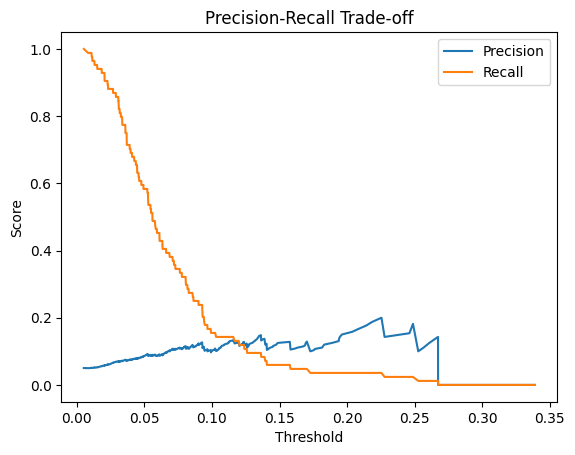

In [ ]:
import matplotlib.pyplot as plt

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Trade-off')
plt.legend()
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_res, y_res = smote.fit_resample(X_train, y_train)

# Train the model on resampled data
model = sm.Logit(y_res, X_res)
result = model.fit()


Optimization terminated successfully.
         Current function value: 0.612349
         Iterations 5


In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_copy1[df_copy1['readmitted'] == 0]
df_minority = df_copy1[df_copy1['readmitted'] == 1]

# Undersample majority class
df_majority_undersampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

# Combine the undersampled majority class with the minority class
df_undersampled = pd.concat([df_majority_undersampled, df_minority])

# Resample data
X_res = df_undersampled.drop(columns='readmitted')
y_res = df_undersampled['readmitted']

# Train model on balanced data
model = sm.Logit(y_res, X_res)
result = model.fit()


Optimization terminated successfully.
         Current function value: 0.654230
         Iterations 5


In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic regression with balanced class weights
model = LogisticRegression(class_weight='balanced')
result = model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import cross_val_score

rf_model = RandomForestClassifier(class_weight='balanced')
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1')
print(f"Cross-validation F1-score: {cv_scores.mean()}")


Cross-validation F1-score: 0.0288470066518847


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Predict the target variable on the test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.6714542190305206
Precision: 0.0913884007029877
Recall: 0.6190476190476191
F1-Score: 0.15926493108728942
ROC AUC Score: 0.6877119152639002
Confusion Matrix:
 [[1070  517]
 [  32   52]]


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance with SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print(f"Before SMOTE: {X_train.shape}, {y_train.value_counts()}")
print(f"After SMOTE: {X_res.shape}, {y_res.value_counts()}")


Before SMOTE: (4456, 11), readmitted
0    4239
1     217
Name: count, dtype: int64
After SMOTE: (8478, 11), readmitted
0    4239
1    4239
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_res, y_res)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1059
           1       0.08      0.15      0.10        55

    accuracy                           0.87      1114
   macro avg       0.52      0.53      0.52      1114
weighted avg       0.91      0.87      0.89      1114

Confusion Matrix:
 [[966  93]
 [ 47   8]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Set up hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', None]
}

# Grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_res, y_res)

# Best parameters and model evaluation
print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the tuned model
print("Tuned Model Classification Report:\n", classification_report(y_test, y_pred_best))
print("Tuned Model Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1059
           1       0.08      0.15      0.10        55

    accuracy                           0.87      1114
   macro avg       0.52      0.53      0.52      1114
weighted avg       0.91      0.87      0.89      1114

Tuned Model Confusion Matrix:
 [[966  93]
 [ 47   8]]


In [ ]:
rf = RandomForestClassifier(n_estimators=100, class_weight={0: 1, 1: 10}, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 1, 1: 10}, random_state=42)

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, _ = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc}")


Precision-Recall AUC: 0.08649277082856359


In [ ]:
# Get the predicted probabilities
y_prob = rf.predict_proba(X_test)[:, 1]

# Adjust the threshold to 0.3 or 0.4
y_pred_adjusted = (y_prob >= 0.3).astype(int)

# Evaluate the model
print(classification_report(y_test, y_pred_adjusted))


              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1059
           1       0.20      0.11      0.14        55

    accuracy                           0.93      1114
   macro avg       0.58      0.54      0.55      1114
weighted avg       0.92      0.93      0.93      1114





---



---



---



In [ ]:
# Step 3: Filter by primary diagnosis (e.g., 'diag_1_name' for specific disease focus)
df_filtered = df_copy1[df_copy1['diag_1_name'] == 2]  # Ensure you reference the correct dataframe

# Step 4: Encode categorical variables ('A1Cresult', 'Sex', etc.)
le = LabelEncoder()

# Encode A1Cresult (HbA1c levels)
df_filtered['A1Cresult'] = le.fit_transform(df_filtered['A1Cresult'])

# Step 5: Select relevant features (e.g., A1Cresult, Age, Sex)
X = df_filtered[['age', 'admission_type_id', 'discharge_disposition_id',
                 'admission_source_id', 'time_in_hospital', 'medical_specialty',
                 'max_glu_serum', 'A1Cresult', 'medical_complexity', 'num_visits']]  # Add more features as necessary

# Encoding any categorical features using LabelEncoder as needed
# Ensure all features are numeric now

# Add constant term for intercept in the model
X = sm.add_constant(X)

# Define the target variable (y)
y = df_filtered['readmitted']

<ipython-input-420-9911e7914786>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['A1Cresult'] = le.fit_transform(df_filtered['A1Cresult'])


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")


Training data shape: (4456, 11), Test data shape: (1114, 11)


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Assuming X_train and y_train are defined already

# Create an XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification
    eval_metric='logloss',        # Evaluation metric for log loss
    use_label_encoder=False,      # Avoid deprecation warning
    random_state=42,
    n_jobs=-1                     # Make use of all available cores
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_prob)}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:54:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1059
           1       0.25      0.04      0.06        55

    accuracy                           0.95      1114
   macro avg       0.60      0.52      0.52      1114
weighted avg       0.92      0.95      0.93      1114

Confusion Matrix:
 [[1053    6]
 [  53    2]]
ROC AUC Score: 0.6192634560906516




---



**Q4**

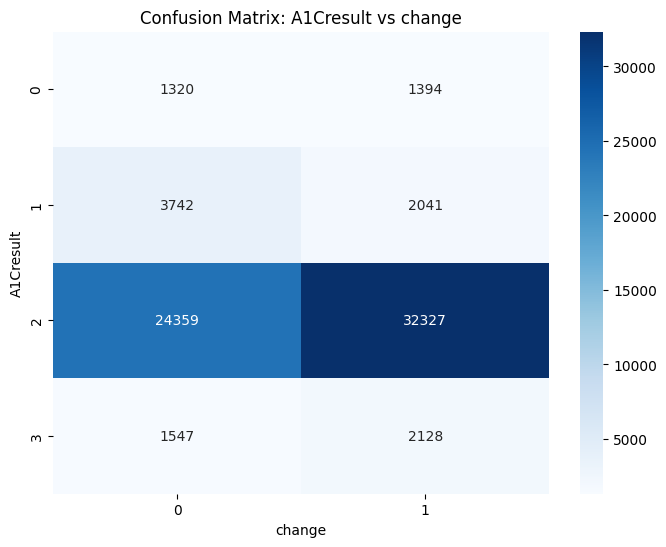

In [ ]:


def create_confusion_matrix(df, col1, col2):
    matrix = pd.crosstab(df[col1], df[col2])
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {col1} vs {col2}')
    plt.xlabel(col2)
    plt.ylabel(col1)
    plt.show()

# Example usage for 'A1Cresult' and 'change'
create_confusion_matrix(df, 'A1Cresult', 'change')

<ipython-input-424-49682c06dc3a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="change", y="A1Cresult", data=df, palette="coolwarm")


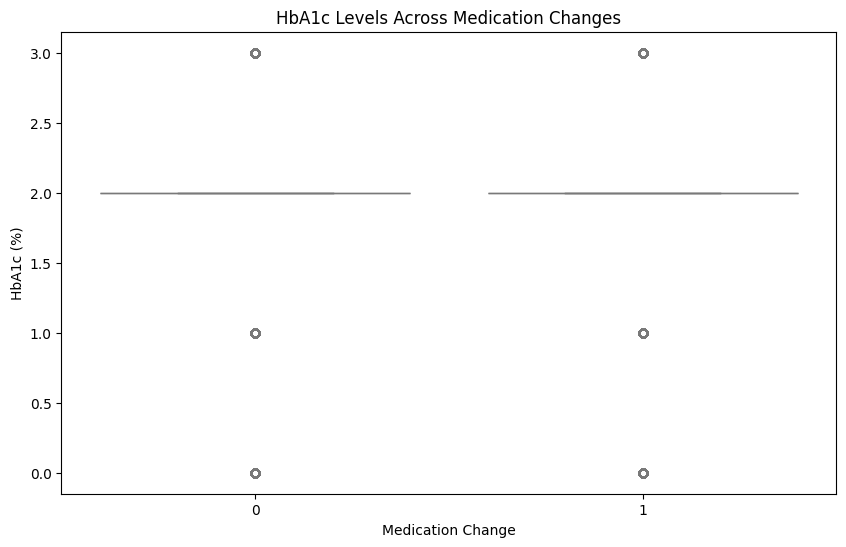

<ipython-input-424-49682c06dc3a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="change", y="A1Cresult", data=df, palette="coolwarm")


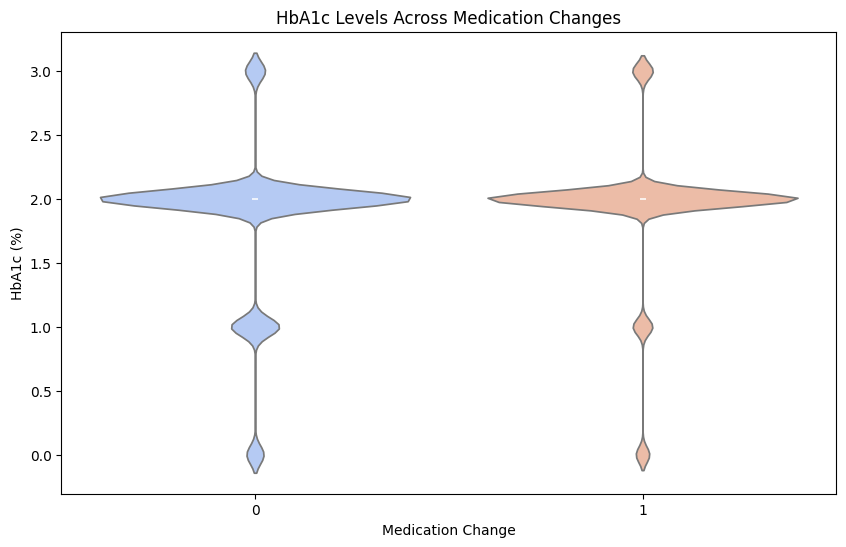

In [ ]:
# Boxplot: HbA1c distribution by medication change category
plt.figure(figsize=(10, 6))
sns.boxplot(x="change", y="A1Cresult", data=df, palette="coolwarm")
plt.title("HbA1c Levels Across Medication Changes")
plt.xlabel("Medication Change")
plt.ylabel("HbA1c (%)")
plt.show()

# Violin plot for better distribution insights
plt.figure(figsize=(10, 6))
sns.violinplot(x="change", y="A1Cresult", data=df, palette="coolwarm")
plt.title("HbA1c Levels Across Medication Changes")
plt.xlabel("Medication Change")
plt.ylabel("HbA1c (%)")
plt.show()


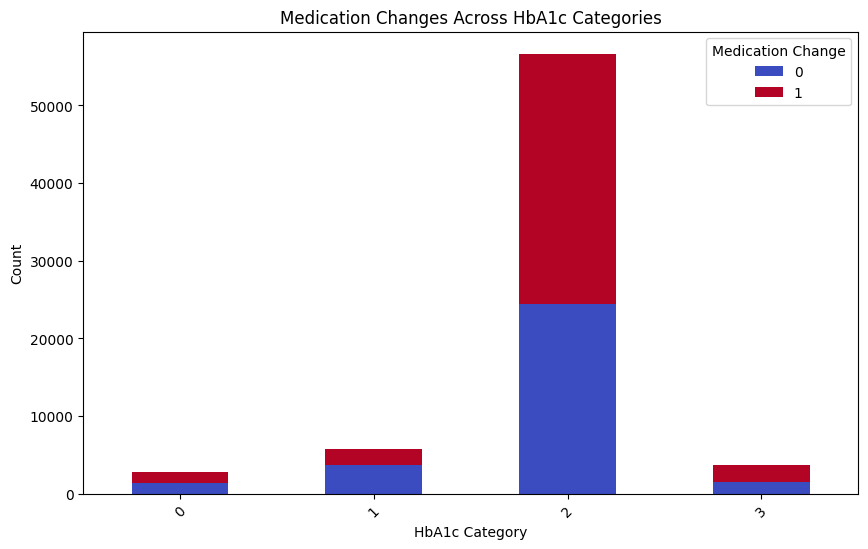

In [ ]:
hba1c_change_counts = df.groupby(["A1Cresult", "change"]).size().unstack()

# Bar plot
hba1c_change_counts.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm")
plt.title("Medication Changes Across HbA1c Categories")
plt.xlabel("HbA1c Category")
plt.ylabel("Count")
plt.legend(title="Medication Change")
plt.xticks(rotation=45)
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df["A1Cresult"], df["change"])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)

# Interpretation
if p < 0.05:
    print("There is a significant relationship between HbA1c levels and medication change.")
else:
    print("No significant relationship found between HbA1c levels and medication change.")


Chi-Square Statistic: 1028.7692756879674
P-Value: 1.0330249206541538e-222
Degrees of Freedom: 3
There is a significant relationship between HbA1c levels and medication change.


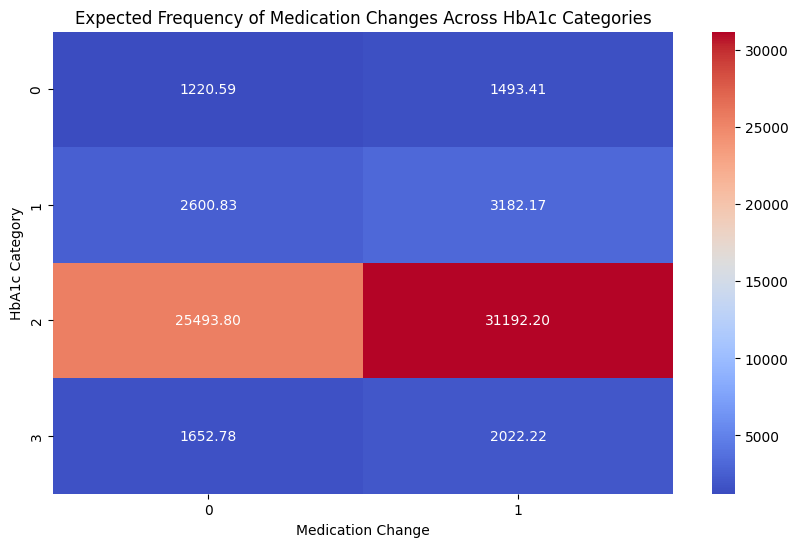

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Expected Frequency of Medication Changes Across HbA1c Categories")
plt.xlabel("Medication Change")
plt.ylabel("HbA1c Category")
plt.show()




---



**Q5**

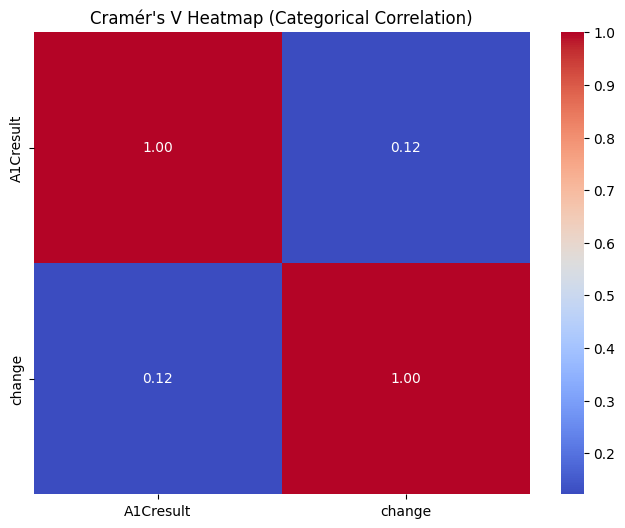

In [ ]:
def cramers_v(x, y):
    contingency_table = pd.crosstab(df[x], df[y])
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    r_corr = r - ((r-1)**2) / (n-1)
    k_corr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min(r_corr-1, k_corr-1))

# Compute pairwise Cramér's V for categorical variables
categorical_vars = ["A1Cresult", "change"]  # Add other categorical columns if needed
cramers_matrix = pd.DataFrame(index=categorical_vars, columns=categorical_vars)

for var1 in categorical_vars:
    for var2 in categorical_vars:
        cramers_matrix.loc[var1, var2] = cramers_v(var1, var2)

# Convert to numeric type
cramers_matrix = cramers_matrix.astype(float)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cramér's V Heatmap (Categorical Correlation)")
plt.show()

Values close to 1 → Strong association (potential multicollinearity).
Values close to 0 → Weak association (low multicollinearity).

In [ ]:
print(df_encoded.dtypes)


insulin          int64
dm               int64
diabetesMed      int64
change           int64
A1Cresult        int64
max_glu_serum    int64
readmitted       int64
dtype: object


In [ ]:
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')


In [ ]:
X = df_encoded.drop(columns=["readmitted"])  # Replace with actual target variable

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

# Convert to numeric (if necessary)
X[non_numeric_cols] = X[non_numeric_cols].apply(pd.to_numeric, errors='coerce')


Non-numeric columns: Index([], dtype='object')


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure X is a NumPy array
X_values = X.values.astype(float)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_values, i) for i in range(X.shape[1])]

print(vif_data)


         Feature        VIF
0        insulin   5.323429
1             dm   6.195843
2    diabetesMed   4.918905
3         change   3.983148
4      A1Cresult  11.218383
5  max_glu_serum  16.483052


In [ ]:
# Loop to drop features with VIF > 10
while True:
    # Identify features with high VIF (VIF > 10)
    high_vif_cols = vif_data[vif_data["VIF"] > 10]["Feature"].tolist()

    # If there are any features with high VIF, drop them
    if high_vif_cols:
        print(f"Dropping features with high VIF: {high_vif_cols}")
        X.drop(columns=high_vif_cols, inplace=True)

        # Recompute VIF after dropping features
        X_values = X.values.astype(float)
        vif_data = pd.DataFrame()
        vif_data["Feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X_values, i) for i in range(X.shape[1])]

        # Print updated VIF
        print("\nUpdated VIF Data:")
        print(vif_data)
    else:
        print("No features with VIF > 10 found. Exiting the loop.")
        break

Dropping features with high VIF: ['A1Cresult', 'max_glu_serum']

Updated VIF Data:
       Feature       VIF
0      insulin  5.320226
1           dm  5.894093
2  diabetesMed  2.227447
3       change  1.513446
No features with VIF > 10 found. Exiting the loop.


In [ ]:
# prompt: make a list of variables having vif < 10

# Assuming vif_data DataFrame is created as in the provided code.

# Filter for features with VIF < 10
low_vif_features = vif_data[vif_data["VIF"] < 10]["Feature"].tolist()

print("Features with VIF < 10:")
low_vif_features

Features with VIF < 10:


['insulin', 'dm', 'diabetesMed', 'change']

In [ ]:
# prompt: using the features above, fit a binary logistic regression model for predicting readmitted

from sklearn.linear_model import LogisticRegression

# Scale numeric features only
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Assuming X and y are your feature matrix and target vector after preprocessing and feature selection
X = df_encoded[low_vif_features]
y = df_encoded['readmitted']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logreg_model = LogisticRegression(random_state=42)  # You can add hyperparameters here if needed
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     13151
           1       0.00      0.00      0.00       621

    accuracy                           0.95     13772
   macro avg       0.48      0.50      0.49     13772
weighted avg       0.91      0.95      0.93     13772

Confusion Matrix:
 [[13151     0]
 [  621     0]]
Accuracy: 0.9549085100203311


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
pip install catboost

In [ ]:
# prompt: use rfclassifier
# Scale numeric features only
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency


# Assuming X and y are your feature matrix and target vector after preprocessing and feature selection
X = df_encoded[low_vif_features]
y = df_encoded['readmitted']

# Train Balanced Random Forest
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced') # Use class_weight instead of class
brf.fit(X_train, y_train)

# Evaluate the model
y_pred_brf = brf.predict(X_test)
print(classification_report(y_test, y_pred_brf))

precision, recall, _ = precision_recall_curve(y_test, brf.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     13151
           1       0.05      1.00      0.09       621

    accuracy                           0.05     13772
   macro avg       0.02      0.50      0.04     13772
weighted avg       0.00      0.05      0.00     13772

Precision-Recall AUC: 0.0644453841349463
Accuracy: 0.9549085100203311


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# prompt: use xgboost

# Assuming X_train, y_train, X_test, and y_test are defined from previous code

# Create an XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification
    eval_metric='logloss',        # Evaluation metric for log loss
    use_label_encoder=False,      # Avoid deprecation warning
    random_state=42,
    n_jobs=-1                     # Make use of all available cores
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_prob)}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:54:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     13151
           1       0.00      0.00      0.00       621

    accuracy                           0.95     13772
   macro avg       0.48      0.50      0.49     13772
weighted avg       0.91      0.95      0.93     13772

Confusion Matrix:
 [[13151     0]
 [  621     0]]
ROC AUC Score: 0.5160949168282054


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# prompt: give accuracy of the above model

# Assuming y_test and y_pred are defined from the XGBoost model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy}")

XGBoost Accuracy: 0.9549085100203311


In [ ]:
# prompt: use adaboost

from sklearn.ensemble import AdaBoostClassifier

# Assuming X_train, y_train, X_test, and y_test are defined from previous code

# Create an AdaBoost model
ada_model = AdaBoostClassifier(random_state=42, n_estimators=100) # You can adjust hyperparameters

# Train the model
ada_model.fit(X_train, y_train)

# Make predictions
y_pred = ada_model.predict(X_test)
y_pred_prob = ada_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_prob)}")

accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Accuracy: {accuracy}")

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     13151
           1       0.00      0.00      0.00       621

    accuracy                           0.95     13772
   macro avg       0.48      0.50      0.49     13772
weighted avg       0.91      0.95      0.93     13772

Confusion Matrix:
 [[13151     0]
 [  621     0]]
ROC AUC Score: 0.5156264330174067
AdaBoost Accuracy: 0.9549085100203311


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))




---



---



---



Histogram and kde


Box plot

Identify noise by looking for outliers

Skewness and kurtosis


Categorical data

# **Multivariate analysis**



1. Scatterplot (Num - Num)

Particular

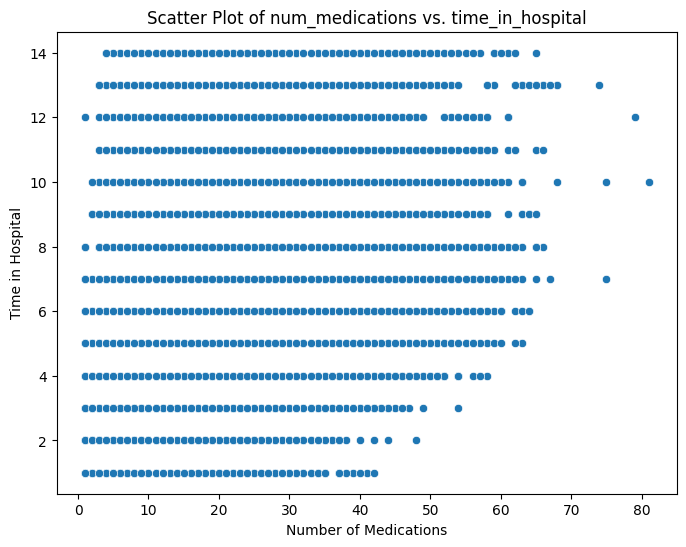

Correlation between num_medications and time_in_hospital: 0.45680395935046453


In [ ]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='num_medications', y='time_in_hospital', data=df)
plt.title('Scatter Plot of num_medications vs. time_in_hospital')
plt.xlabel('Number of Medications')
plt.ylabel('Time in Hospital')
plt.show()

correlation = df['num_medications'].corr(df['time_in_hospital'])
print(f"Correlation between num_medications and time_in_hospital: {correlation}")

In [ ]:
#sns.scatterplot(df['time_in_hospitals'],df['num_medications'],hue = df['race'], style = df['gender'], size = df[''])
# z is categorical variable on which basis the x and y is sep
# c is another cat var
# s is no. of that particular occurrence

<Axes: xlabel='time_in_hospital', ylabel='num_medications'>

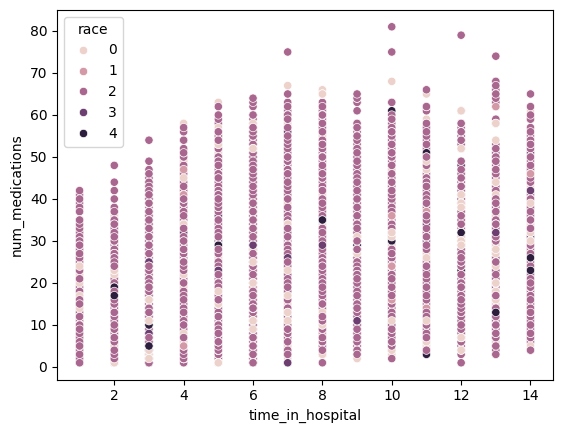

In [ ]:
import seaborn as sns
sns.scatterplot(x = 'time_in_hospital',y = 'num_medications', data =df, hue = 'race')
# z is categorical variable on which basis the x and y is sep
# c is another cat var
# s is no. of that particular occurrence